### Required Assignment 5.1: Will the Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaurant near where you are driving. Would you accept that coupon and take a short detour to the restaurant? Would you accept the coupon but use it on a subsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaurant? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\$20 - $50).

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece.





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [155]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import plotly.express as px
import math

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [156]:
data = pd.read_csv('data/coupons.csv')

In [157]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


2. Investigate the dataset for missing or problematic data.

In [158]:
# check data frame info , shape 
data.info()
data.describe()
data.shape


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

(12684, 26)

In [159]:
# describe the data frame
data.describe()

,temperature,has_children,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
count,12684.000000,12684.000000,12684.0,12684.000000,12684.000000,12684.000000,12684.000000,12684.000000
mean,63.301798,0.414144,1.0,0.561495,0.119126,0.214759,0.785241,0.568433
std,19.154486,0.492593,0.0,0.496224,0.323950,0.410671,0.410671,0.495314
min,30.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,55.000000,0.000000,1.0,0.000000,0.000000,0.000000,1.000000,0.000000
50%,80.000000,0.000000,1.0,1.000000,0.000000,0.000000,1.000000,1.000000
75%,80.000000,1.000000,1.0,1.000000,0.000000,0.000000,1.000000,1.000000
max,80.000000,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000


In [160]:
# check for null values 
data.isnull().sum()
# seeing car has 12576 null values which is a significant amount of data considering the data set has 12684 rows.


destination                 0
passanger                   0
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Y                           0
dtype: int64

3. Decide what to do about your missing data -- drop, replace, other...

In [161]:
# it is too large to drop the rows with null values so we will drop the column car instead. There cannot be any assumptions made about the data in this column.
data.drop(columns=['car'], inplace=True)
data.isnull().sum()

destination               0
passanger                 0
weather                   0
temperature               0
time                      0
coupon                    0
expiration                0
gender                    0
age                       0
maritalStatus             0
has_children              0
education                 0
occupation                0
income                    0
Bar                     107
CoffeeHouse             217
CarryAway               151
RestaurantLessThan20    130
Restaurant20To50        189
toCoupon_GEQ5min          0
toCoupon_GEQ15min         0
toCoupon_GEQ25min         0
direction_same            0
direction_opp             0
Y                         0
dtype: int64

In [162]:
# there are still missing data for bar, coffee house, carry away,RestaurantLessThan20, Restaurant20To50 
# extracting the columns with null values into a new data frame
missing_data = data[data.isnull().any(axis=1)]
columns_with_missing_data = missing_data.columns[missing_data.isnull().any()].tolist()
missing_data_dataFrame = missing_data[columns_with_missing_data]
missing_data_dataFrame.head()
missing_data_dataFrame.shape
missing_data_dataFrame.describe()


,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50
count,498,388,454,475,416
unique,5,4,5,4,4
top,never,4~8,4~8,1~3,less1
freq,263,125,175,213,218


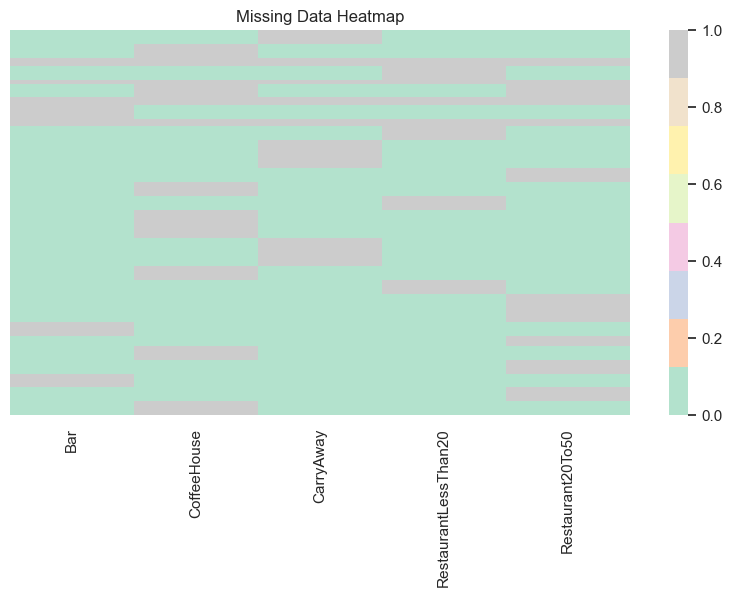

In [163]:
sns.heatmap(missing_data_dataFrame.isnull(), cbar=True, cmap='Pastel2', yticklabels=False)
plt.title('Missing Data Heatmap')
plt.show()

# the heatmap shows that there are 5 columns with missing data and there are some cases where all the columns has null.



In [164]:
data.shape
# (12684, 5)
missing_data_dataFrame.shape
# (605, 5)



(605, 5)

In [165]:
# will drop the rows with null values when all the columns bar, coffee house, carry away,RestaurantLessThan20, Restaurant20To50 are null.
cleaned_data = data[data[['Bar', 'CoffeeHouse', 'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50']].isnull().sum(axis=1) < 5]


C:\Users\garun\AppData\Local\Temp\ipykernel_21900\738754440.py:4: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



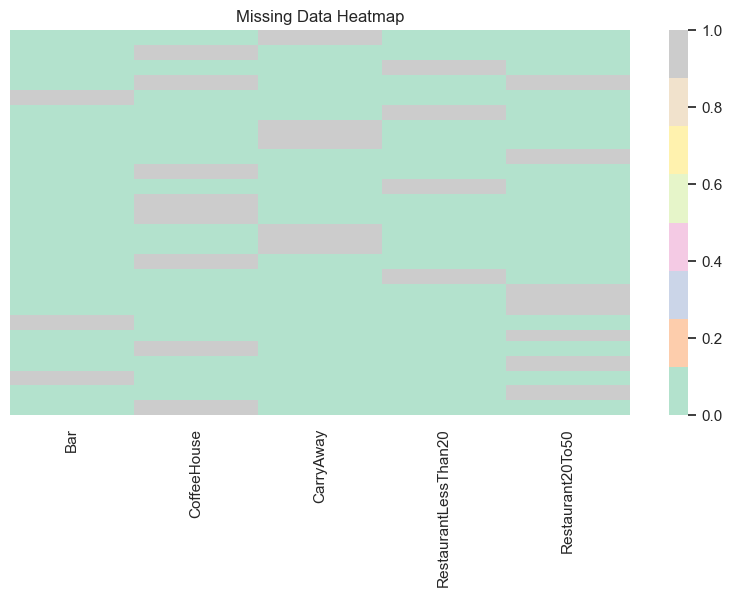

In [166]:
cleaned_data.shape
#(12642, 25)

md_cleaned = cleaned_data[data.isnull().any(axis=1)]


columns_with_missing_data_after_cleaning = md_cleaned.columns[md_cleaned.isnull().any()].tolist()
columns_with_missing_data_after_cleaning

md_cleaned_dataFrame = md_cleaned[columns_with_missing_data_after_cleaning]
md_cleaned_dataFrame.shape

sns.heatmap(md_cleaned_dataFrame.isnull(), cbar=True, cmap='Pastel2', yticklabels=False)
plt.title('Missing Data Heatmap')
plt.show()


#remoed rows where all the columns bar, coffee house, carry away,RestaurantLessThan20, Restaurant20To50 are null.



In [167]:
# checking for duplicates in the data set
count_of_duplicate_rows =  cleaned_data.duplicated().sum()
print("count_of_duplicate_rows",count_of_duplicate_rows)
#74 duplicates found in the data set.

# but the data does not have personal iformation to say if the duplicates are the same person or not. so we will keep the duplicates in the data set.


count_of_duplicate_rows 74


4. What proportion of the total observations chose to accept the coupon?



In [168]:
coupon_accepted_dataFrame = cleaned_data[cleaned_data['Y'] == 1]
coupon_accepted_dataFrame.head()
coupon_accepted_dataFrame.shape
#(7181, 25)
coupon_rejected_dataFrame = cleaned_data[cleaned_data['Y'] == 0]
coupon_rejected_dataFrame.head()
coupon_rejected_dataFrame.shape
#(5561, 25)

propotiomn_of_coupon_accepted = coupon_accepted_dataFrame.shape[0] / cleaned_data.shape[0]

print("Total Observations: ", cleaned_data.shape[0])
print("Coupon Accepted Observations: ", coupon_accepted_dataFrame.shape[0])
print("Coupon Rejected Observations: ", coupon_rejected_dataFrame.shape[0])
print("Coupon Accepted Proportion: ", round(propotiomn_of_coupon_accepted,2))







Total Observations:  12642
Coupon Accepted Observations:  7181
Coupon Rejected Observations:  5461
Coupon Accepted Proportion:  0.57


5. Use a bar plot to visualize the `coupon` column.

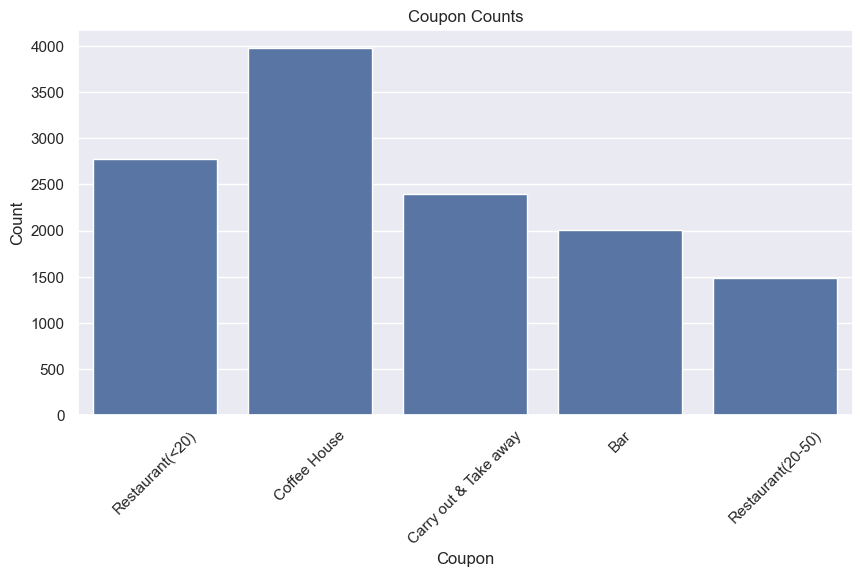

In [169]:
coupon_counts = cleaned_data['coupon'].value_counts().reset_index()
coupon_counts.columns = ['coupon', 'count']
px.bar(coupon_counts, x='coupon', y='count', title='Coupon Counts', color='count', color_continuous_scale=px.colors.sequential.Blues).show()
sns.countplot(data=cleaned_data, x='coupon')
plt.xticks(rotation=45) 
plt.title('Coupon Counts')
plt.xlabel('Coupon')
plt.ylabel('Count')
plt.show()    
    

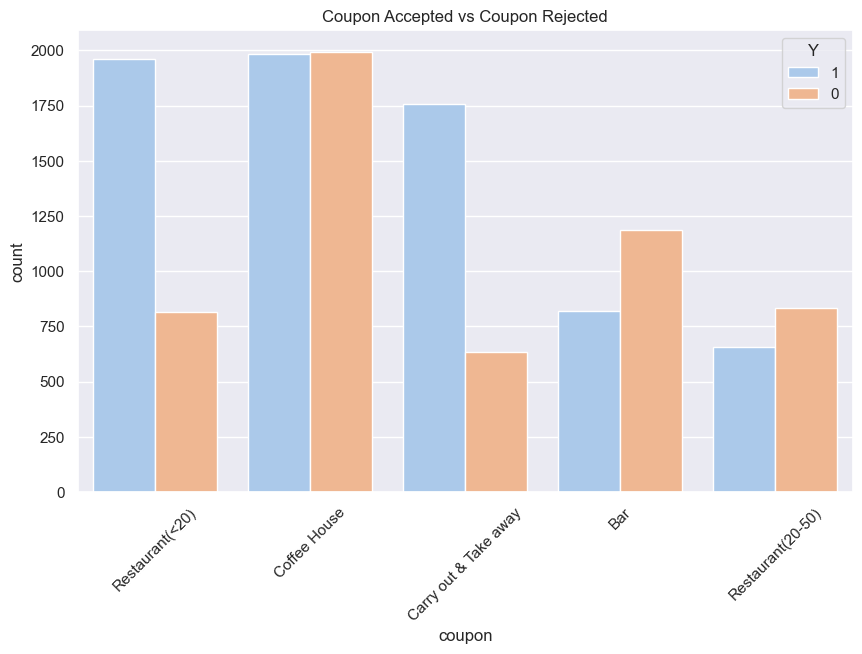

In [170]:
# plot the coupon counts with the accepted and rejected coupons
plt.figure(figsize=(10, 6))
sns.countplot(x='coupon', data=cleaned_data, palette='pastel', hue='Y', hue_order=[1, 0])
plt.xticks(rotation=45)
plt.title('Coupon Accepted vs Coupon Rejected') 
plt.show()

6. Use a histogram to visualize the temperature column.

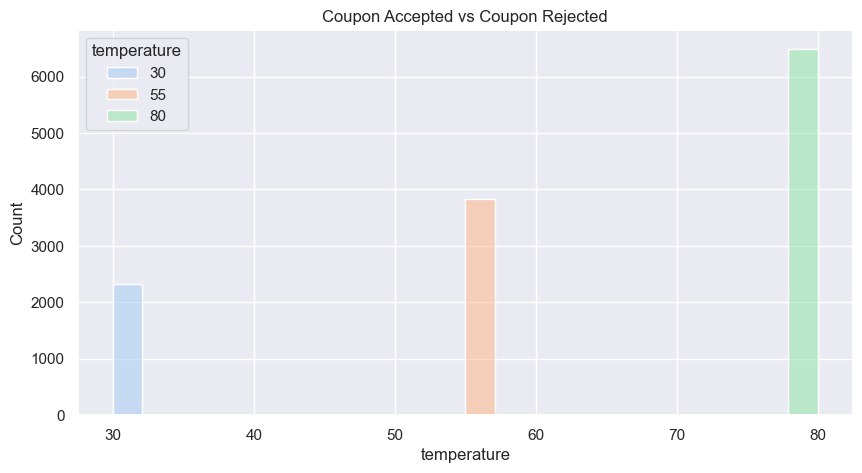

In [171]:
px.histogram(cleaned_data, x='temperature', title='Coupon Accepted vs Coupon Rejected', barmode='group', marginal='violin').show()
sns.histplot(data=cleaned_data, x='temperature', hue="temperature", palette='pastel', kde=True)
plt.title('Coupon Accepted vs Coupon Rejected')
plt.show()

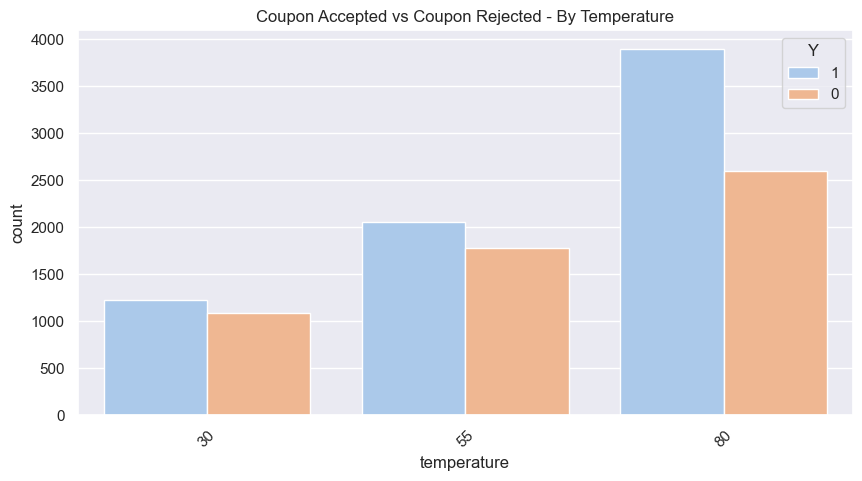

In [172]:
sns.countplot(x='temperature', data=cleaned_data, palette='pastel', hue='Y', hue_order=[1, 0])
plt.xticks(rotation=45)
plt.title('Coupon Accepted vs Coupon Rejected - By Temperature') 
plt.show()

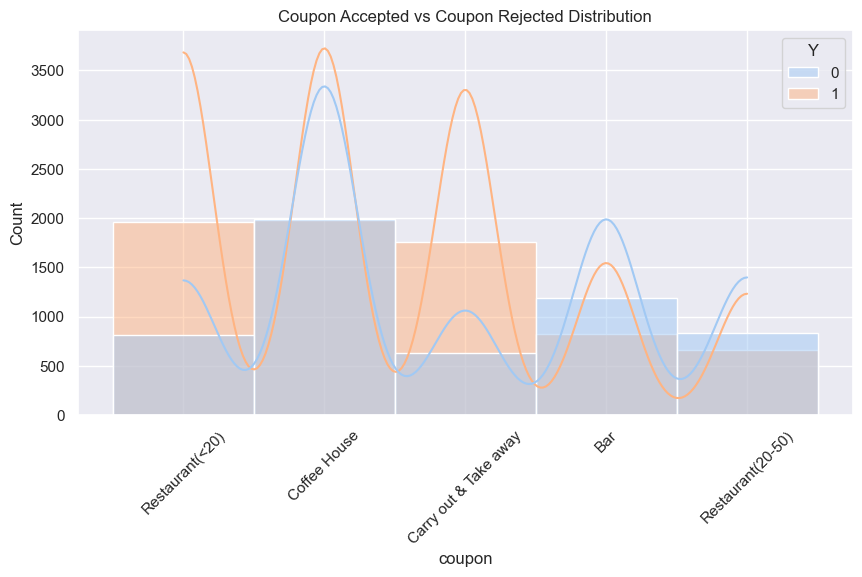

In [173]:
# check the distribution of the data
sns.histplot(data=cleaned_data, x='coupon', hue='Y', kde=True, palette='pastel')
plt.xticks(rotation=45)
plt.title('Coupon Accepted vs Coupon Rejected Distribution') 
plt.show()

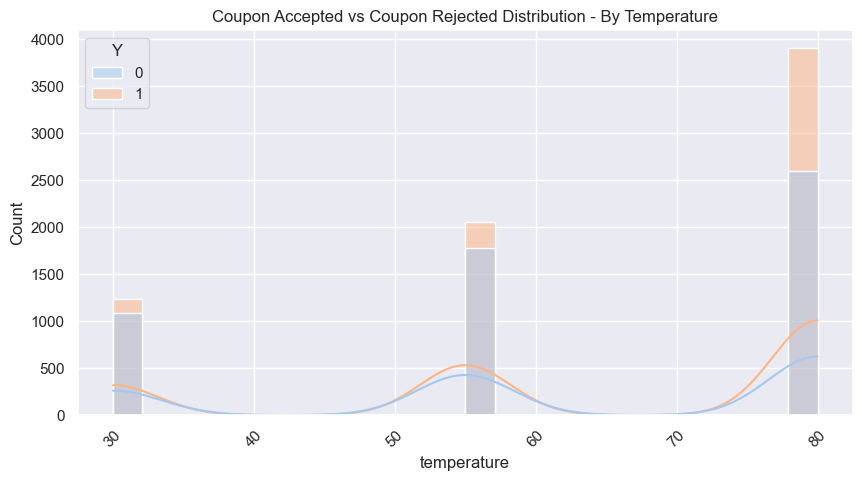

In [174]:
# check the distribution of the data by temperature 
sns.histplot(data=cleaned_data, x='temperature', hue='Y', kde=True, palette='pastel')
plt.xticks(rotation=45)
plt.title('Coupon Accepted vs Coupon Rejected Distribution - By Temperature') 
plt.show()

# not enough data to make any assumptions about the data. there is a growing trend when the temperature is above 70 degrees. but not enough data to make any assumptions about the data.

In [175]:
# check the mean median and mode of the data
cleaned_data.describe()
px.box(cleaned_data, y='temperature',x='coupon', color='Y', title='coupon vs temperature').show()



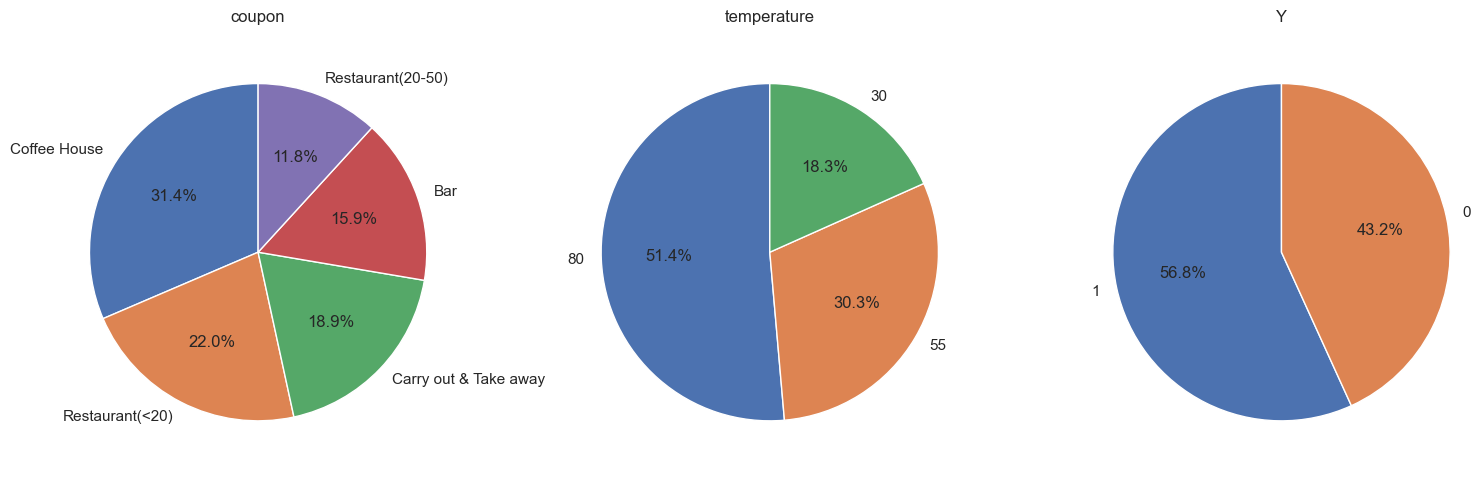

In [176]:
pie_column = ['coupon','temperature','Y']
fig, axes = plt.subplots(1, len(pie_column), figsize=(15, 5))

for i, col in enumerate(pie_column):
    axes[i].pie(cleaned_data[col].value_counts(), labels=cleaned_data[col].value_counts().index, autopct='%1.1f%%', startangle=90)
    axes[i].axis('equal') 
    axes[i].set_title(col)
    
plt.tight_layout()
plt.show()
# check the correlation of the data

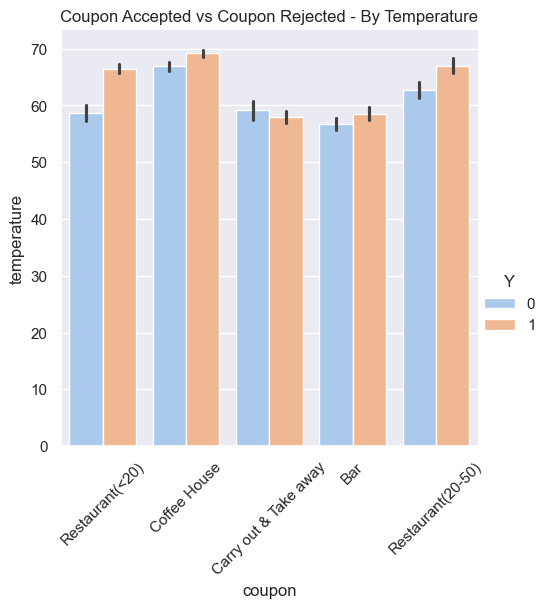

In [177]:
sns.catplot(data=cleaned_data, x='coupon', y='temperature', hue='Y', kind='bar', palette='pastel')
plt.xticks(rotation=45)
plt.title('Coupon Accepted vs Coupon Rejected - By Temperature')
plt.show()  


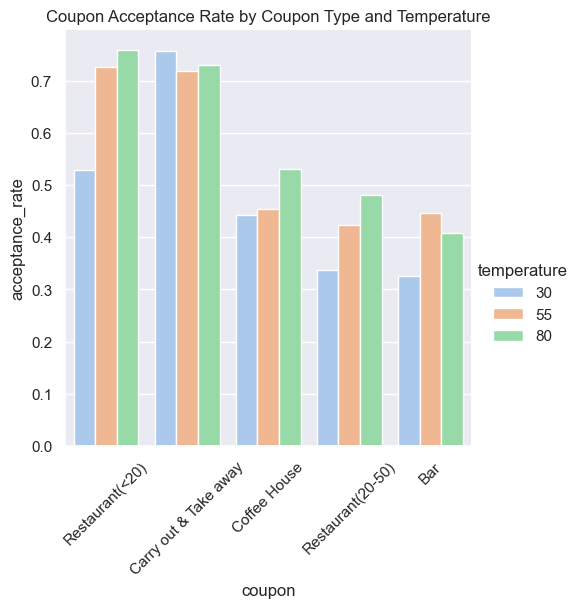

In [178]:
acceptance_rate = cleaned_data.groupby(['coupon','temperature'])['Y'].value_counts(normalize=True).unstack().fillna(0)
acceptance_rate = acceptance_rate.reset_index()
acceptance_rate.columns = ['coupon', 'temperature', 'rejected', 'accepted']
acceptance_rate['acceptance_rate'] = acceptance_rate['accepted'] / (acceptance_rate['accepted'] + acceptance_rate['rejected'])
acceptance_rate = acceptance_rate.sort_values(by='acceptance_rate', ascending=False)

px.bar(acceptance_rate, x='coupon', y='acceptance_rate', color='temperature', title='Coupon Acceptance Rate by Coupon Type and Temperature', barmode='overlay').show()
sns.catplot(data=acceptance_rate, x='coupon', y='acceptance_rate', hue='temperature', kind='bar', palette='pastel')
plt.xticks(rotation=45)
plt.title('Coupon Acceptance Rate by Coupon Type and Temperature')
plt.show()


**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [179]:
bar_dataframe = cleaned_data[cleaned_data["coupon"] == "Bar"]
bar_dataframe.head()    

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
9,No Urgent Place,Kid(s),Sunny,80,10AM,Bar,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
13,Home,Alone,Sunny,55,6PM,Bar,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,1,0,1
17,Work,Alone,Sunny,55,7AM,Bar,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,1,0,1,0
24,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,1
35,Home,Alone,Sunny,55,6PM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,1,0,1


2. What proportion of bar coupons were accepted?


In [180]:
total_bar_count = bar_dataframe.shape[0]
print("Total Bar Count: ", total_bar_count)
bar_dataframe = bar_dataframe.dropna(subset=['Bar'])
print("Total Bar Count after removing the nulls: ", bar_dataframe.shape[0])

bar_accepted_count = bar_dataframe[bar_dataframe["Y"] == 1].shape[0]
print("Bar Accepted Count: ", bar_accepted_count)
propotiomn_of_coupon_accepted = bar_accepted_count / total_bar_count
print("Bar Accepted Proportion: ", round(propotiomn_of_coupon_accepted,2))

# using mean function to calculate the proportion of accepted coupons
print("Bar Accepted propotion by mean function: ", round(bar_dataframe["Y"].mean(),2))





Total Bar Count:  2008
Total Bar Count after removing the nulls:  1996
Bar Accepted Count:  819
Bar Accepted Proportion:  0.41
Bar Accepted propotion by mean function:  0.41


3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


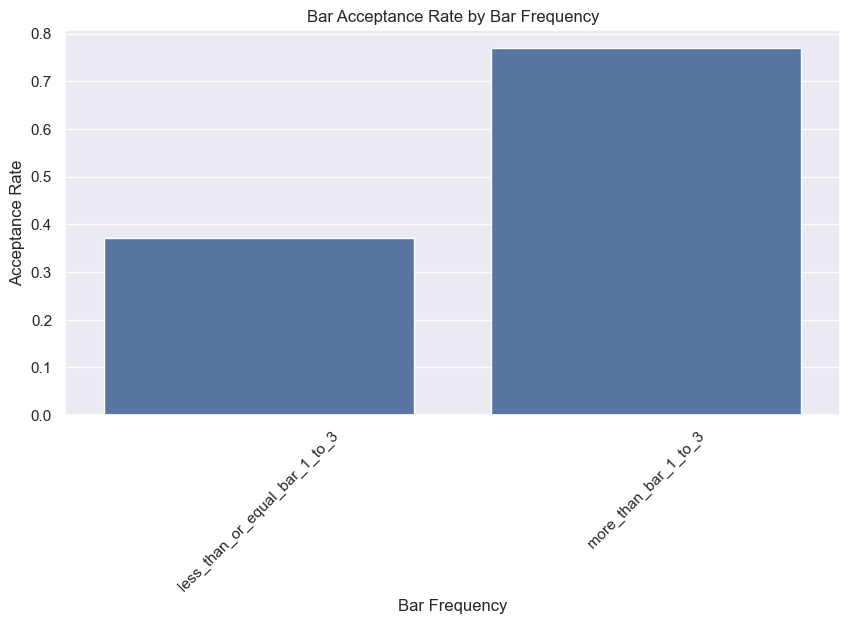

,Bar,Accepted Count,Total Count,Acceptance Rate
0,less_than_or_equal_bar_1_to_3,666,1797,0.370618
1,more_than_bar_1_to_3,153,199,0.768844


In [181]:

less_than_or_equal_bar_1_to_3 = bar_dataframe[bar_dataframe["Bar"].isin(['never','less1' ,'1~3'])]
more_than_bar_1_to_3 = bar_dataframe[~bar_dataframe["Bar"].isin(['never','less1' ,'1~3'])]

less_than_or_equal_bar_1_to_3_accepted_count = less_than_or_equal_bar_1_to_3[less_than_or_equal_bar_1_to_3["Y"] == 1].shape[0]

more_than_bar_1_to_3_accepted_count = more_than_bar_1_to_3[more_than_bar_1_to_3["Y"] == 1].shape[0]

less_than_or_equal_bar_1_to_3_accepteance_rate = less_than_or_equal_bar_1_to_3_accepted_count / less_than_or_equal_bar_1_to_3.shape[0]

more_than_bar_1_to_3_accepteance_rate = more_than_bar_1_to_3_accepted_count / more_than_bar_1_to_3.shape[0]


bar_3_times_vs_more_graph_dataframe = pd.DataFrame({
    'Bar': ['less_than_or_equal_bar_1_to_3', 'more_than_bar_1_to_3'],
    'Accepted Count': [less_than_or_equal_bar_1_to_3_accepted_count, more_than_bar_1_to_3_accepted_count],
    'Total Count': [less_than_or_equal_bar_1_to_3.shape[0], more_than_bar_1_to_3.shape[0]],
    'Acceptance Rate': [less_than_or_equal_bar_1_to_3_accepteance_rate, more_than_bar_1_to_3_accepteance_rate]
})

sns.barplot(data=bar_3_times_vs_more_graph_dataframe, x='Bar', y='Acceptance Rate')
plt.title('Bar Acceptance Rate by Bar Frequency')
plt.xlabel('Bar Frequency')
plt.ylabel('Acceptance Rate')
plt.xticks(rotation=45)
plt.show()
bar_3_times_vs_more_graph_dataframe.reset_index(drop=True).head()



4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


Got to Bar more than once a month and age >25:  0.7
Others from Bar Dataset:  0.39
Others from Clean Dataset:  0.59


C:\Users\garun\AppData\Local\Temp\ipykernel_21900\803190007.py:11: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



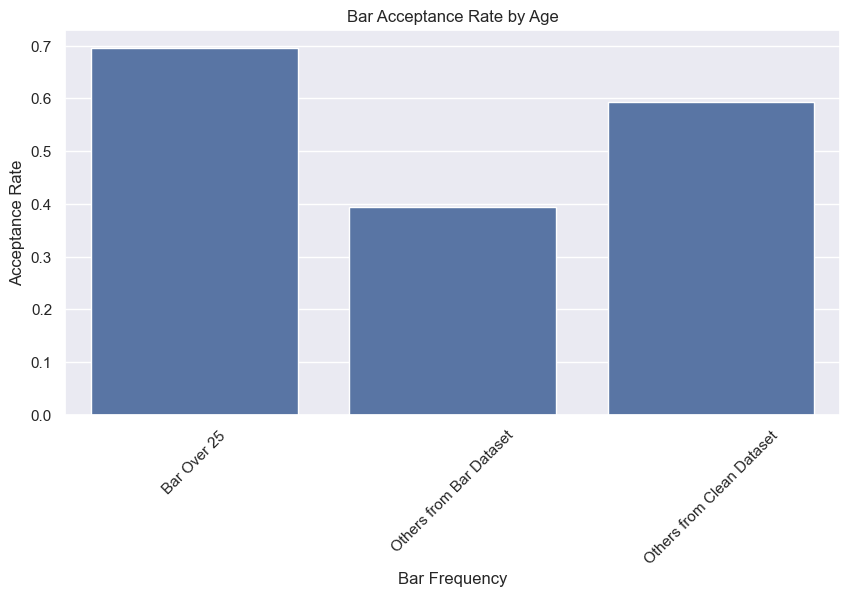

,Bar,Acceptance Rate
0,Bar Over 25,0.695238
1,Others from Bar Dataset,0.394495
2,Others from Clean Dataset,0.593825


In [182]:
bar_dataframe_over_25_years = bar_dataframe[
    bar_dataframe["Bar"].isin(['1~3','4~8','gt8']) & 
    ~bar_dataframe["age"].isin(['21','below21'])
]

dataframe_others_all = cleaned_data[
    ~cleaned_data["Bar"].isin(['1~3','4~8','gt8']) &
    cleaned_data["age"].isin(['21','below21'])
]

bar_dataframe_others = bar_dataframe[
    ~cleaned_data["Bar"].isin(['1~3','4~8','gt8']) &
    cleaned_data["age"].isin(['21','below21'])
]

print("Got to Bar more than once a month and age >25: ", round(bar_dataframe_over_25_years['Y'].mean(),2))
print("Others from Bar Dataset: ", round(bar_dataframe_others['Y'].mean(),2))
print("Others from Clean Dataset: ", round(dataframe_others_all['Y'].mean(),2))

compare_bar__for_age_frequency_dataframe = pd.DataFrame({
    'Bar': ['Bar Over 25', 'Others from Bar Dataset', 'Others from Clean Dataset'],
    'Acceptance Rate': [bar_dataframe_over_25_years['Y'].mean(), bar_dataframe_others['Y'].mean(), dataframe_others_all['Y'].mean()]
})

sns.barplot(data=compare_bar__for_age_frequency_dataframe, x='Bar', y='Acceptance Rate') 
sns.set_theme(rc={'figure.figsize':(10,5)})
plt.title('Bar Acceptance Rate by Age')
plt.xlabel('Bar Frequency')
plt.ylabel('Acceptance Rate')
plt.xticks(rotation=45)
plt.show()
compare_bar__for_age_frequency_dataframe.reset_index(drop=True).head()




5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry.


Got to Bar more than once a month and no kids and occupation not Farming Fishing & Forestry:  0.71
Others from Bar Dataset:  0.29


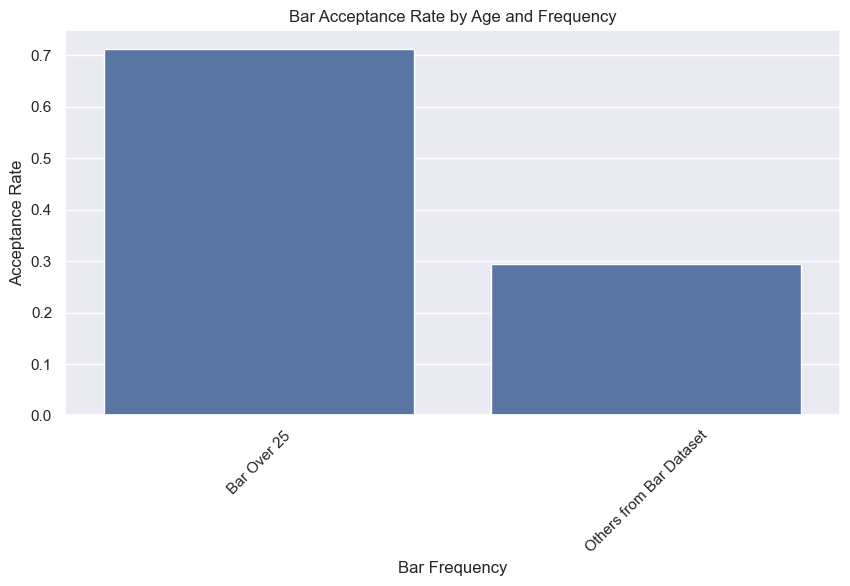

,Bar,Acceptance Rate
0,Bar Over 25,0.713249
1,Others from Bar Dataset,0.294810


In [183]:
bar_dataframe_no_kids_not_FFF = bar_dataframe[
    bar_dataframe["Bar"].isin(['1~3','4~8','gt8']) & 
    ~bar_dataframe["passanger"].isin(['Kid(s)']) &
    ~bar_dataframe["occupation"].isin(['Farming Fishing & Forestry']) 
]
bar_dataframe_others_DF = bar_dataframe[~bar_dataframe.index.isin(bar_dataframe_no_kids_not_FFF.index)]
  
print("Got to Bar more than once a month and no kids and occupation not Farming Fishing & Forestry: ", round(bar_dataframe_no_kids_not_FFF['Y'].mean(),2))
print("Others from Bar Dataset: ", round(bar_dataframe_others_DF['Y'].mean(),2))

non_farming_fishing_bar_dataframe = pd.DataFrame({
    'Bar': ['Bar Over 25', 'Others from Bar Dataset'],
    'Acceptance Rate': [bar_dataframe_no_kids_not_FFF['Y'].mean(), bar_dataframe_others_DF['Y'].mean()]
})


sns.barplot(data=non_farming_fishing_bar_dataframe, x='Bar', y='Acceptance Rate')
sns.set_theme(rc={'figure.figsize':(10,5)})
plt.title('Bar Acceptance Rate by Age and Frequency')
plt.xlabel('Bar Frequency')
plt.ylabel('Acceptance Rate')
plt.xticks(rotation=45)
plt.show()
non_farming_fishing_bar_dataframe.reset_index(drop=True).head()


6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K.



Got to Bar more than once a month and no kids and not widowed:  0.71
Got to Bar more than once a month and under 30:  0.72
Got to Bar more than four times a month income less than 50K:  0.77
Got to Bar more than once a month and no kids and not widowed or under 30 or income less than 50K:  0.71
Got to Bar not matching above conditions:  0.29


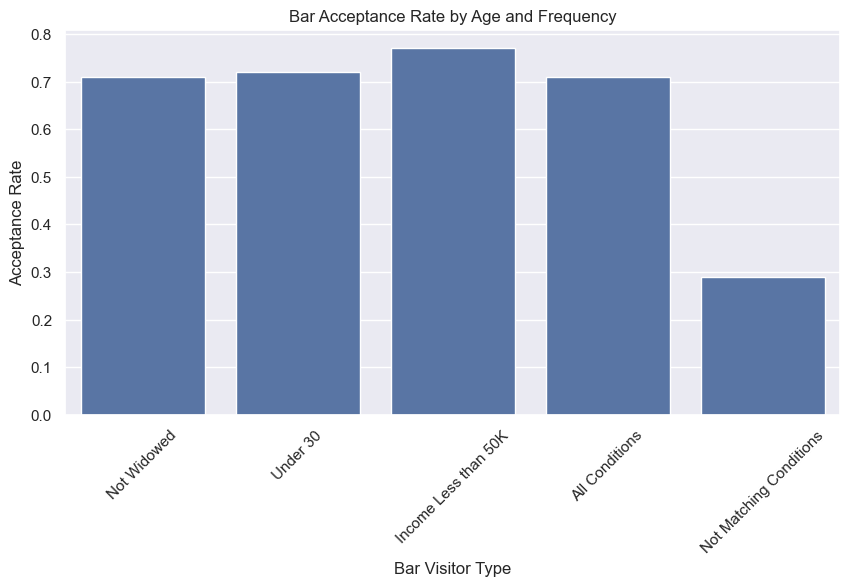

,Bar Vistior Type,Acceptance Rate
0,Not Widowed,0.71
1,Under 30,0.72
2,Income Less than 50K,0.77
3,All Conditions,0.71
4,Not Matching Conditions,0.29


In [184]:
bar_dataframe_no_kids_not_widowed = bar_dataframe[
    bar_dataframe["Bar"].isin(['1~3','4~8','gt8']) & 
    ~bar_dataframe["passanger"].isin(['Kid(s)']) &
    ~bar_dataframe["maritalStatus"].isin(['Widowed']) 
]

bar_dataframe_under_30 = bar_dataframe[
    bar_dataframe["Bar"].isin(['1~3','4~8','gt8']) & 
    bar_dataframe["age"].isin(['below21','21','26']) 
]

bar_dataframe_under_30.head()

bar_dataframe_4above_Income_less_50K = bar_dataframe[
    bar_dataframe["Bar"].isin(['1~3','4~8','gt8']) & 
    bar_dataframe["income"].isin(['Less than $12500','$12500 - $24999','$25000 - $37499','$37500 - $49999']) &
    bar_dataframe["RestaurantLessThan20"].isin(['4~8','gt8']) 
]

bar_dataframe_no_kids_not_widowed_mean = round(bar_dataframe_no_kids_not_widowed['Y'].mean(),2)
bar_dataframe_under_30_mean = round(bar_dataframe_under_30['Y'].mean(),2)
bar_dataframe_4above_Income_less_50K_mean = round(bar_dataframe_4above_Income_less_50K['Y'].mean(),2)

print("Got to Bar more than once a month and no kids and not widowed: ", bar_dataframe_no_kids_not_widowed_mean)
print("Got to Bar more than once a month and under 30: ", bar_dataframe_under_30_mean)
print("Got to Bar more than four times a month income less than 50K: ", bar_dataframe_4above_Income_less_50K_mean)

bar_dataframe_satisfying_all_conditions = bar_dataframe[ (bar_dataframe["Bar"].isin(['1~3','4~8','gt8']) & 
    ~bar_dataframe["passanger"].isin(['Kid(s)']) &
    ~bar_dataframe["maritalStatus"].isin(['Widowed'])) | (bar_dataframe["Bar"].isin(['1~3','4~8','gt8']) & 
    bar_dataframe["age"].isin(['below21','21','26']) ) | (bar_dataframe["Bar"].isin(['1~3','4~8','gt8']) & 
    bar_dataframe["income"].isin(['Less than $12500','$12500 - $24999','$25000 - $37499','$37500 - $49999']) &
    bar_dataframe["RestaurantLessThan20"].isin(['4~8','gt8']) )]

bar_dataframe_not_satisfying_all_conditions = bar_dataframe[~bar_dataframe.index.isin(bar_dataframe_satisfying_all_conditions.index)]
bar_dataframe_satisfying_all_conditions_mean = round(bar_dataframe_satisfying_all_conditions['Y'].mean(),2)
bar_dataframe_not_satisfying_all_conditions_mean = round(bar_dataframe_not_satisfying_all_conditions['Y'].mean(),2)

print("Got to Bar more than once a month and no kids and not widowed or under 30 or income less than 50K: ", bar_dataframe_satisfying_all_conditions_mean)
print("Got to Bar not matching above conditions: ", bar_dataframe_not_satisfying_all_conditions_mean)


bar_dataframe_satisfying_all_conditions = pd.DataFrame({
    'Bar Vistior Type': ['Not Widowed', 
            'Under 30', 
            'Income Less than 50K'
            ,'All Conditions'
            ,'Not Matching Conditions'],
    'Acceptance Rate': [bar_dataframe_no_kids_not_widowed_mean, 
                        bar_dataframe_under_30_mean, 
                        bar_dataframe_4above_Income_less_50K_mean,
                        bar_dataframe_satisfying_all_conditions_mean,
                        bar_dataframe_not_satisfying_all_conditions_mean]
    
})

sns.barplot(data=bar_dataframe_satisfying_all_conditions, x='Bar Vistior Type', y='Acceptance Rate')
sns.set_theme(rc={'figure.figsize':(10,5)}) 
plt.title('Bar Acceptance Rate by Age and Frequency')
plt.xlabel('Bar Visitor Type')
plt.ylabel('Acceptance Rate')
plt.xticks(rotation=45)
plt.show()
bar_dataframe_satisfying_all_conditions.reset_index(drop=True).head()



7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

In [185]:
# hypothesis : Yound and Middle aged drivers who are not divorced and visit bars frquently with a low income are more likely to accpet bar coupons
# when they are not travelling with kids.

#Few Observations from the above analysis:
# Bar coupon acceptance is more when the temperature is mid range around the 55ish degree.
# Bar coupon acceptance is more when there are no kids travelling with the driver.
# Bar coupon acceptance is more when the driver is not widowed. Showing the drivers are more socialable and like to travel with friends and family.
# Bar coupon acceptance is less than other coupons such as coffee house, carry out & away and restaurant under $20. Showing given a choice the driver would  prefer to to go to a cheap restaurant or coffee house or take out than a bar.
# Bar coupon acceptance tend to be a little more when the driver is not in the Farming Fishing & Forestry occupation.
# Bar Coupon acceptance is more when the driver is more budget consious visting cheap restarunt more than 4 times a month.
# 4 time a month also shows the driver is more socialable and likes to go out with friends and family.
# Bar Coupon acceptance is more when the diver income is low 

# The above analysis does not consider all the factors that can affect the coupon acceptance and would require more analysis to get a better understanding of the data and trends.


### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

Non Habbit Data Accepted count:  (7181, 16)
Non Habbit Data Rejected count:  (5461, 16)


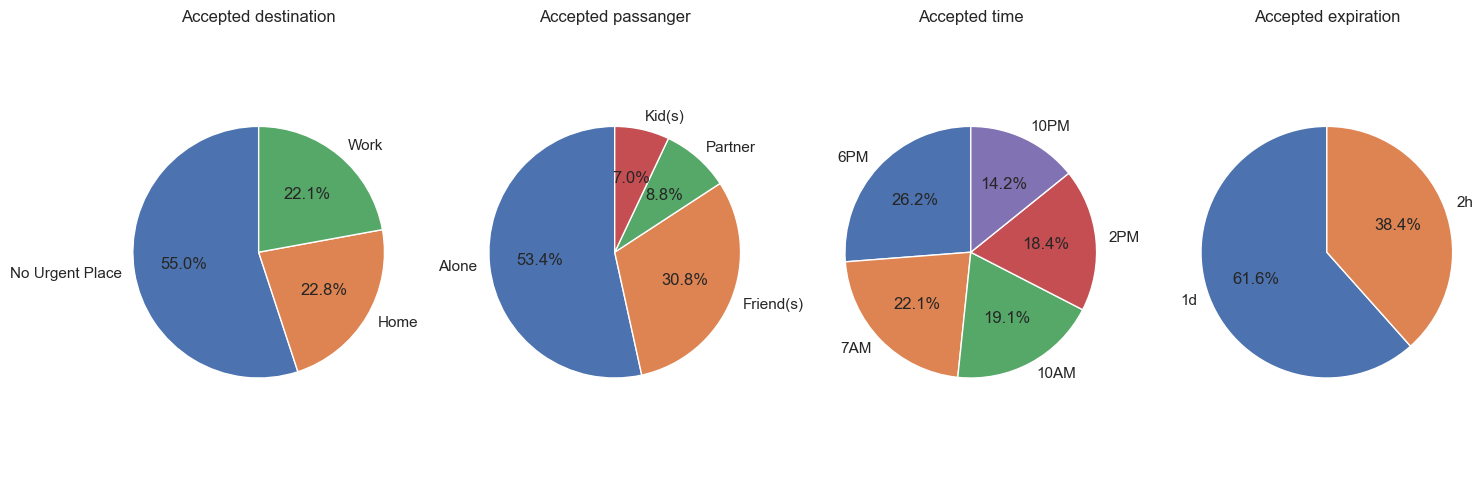

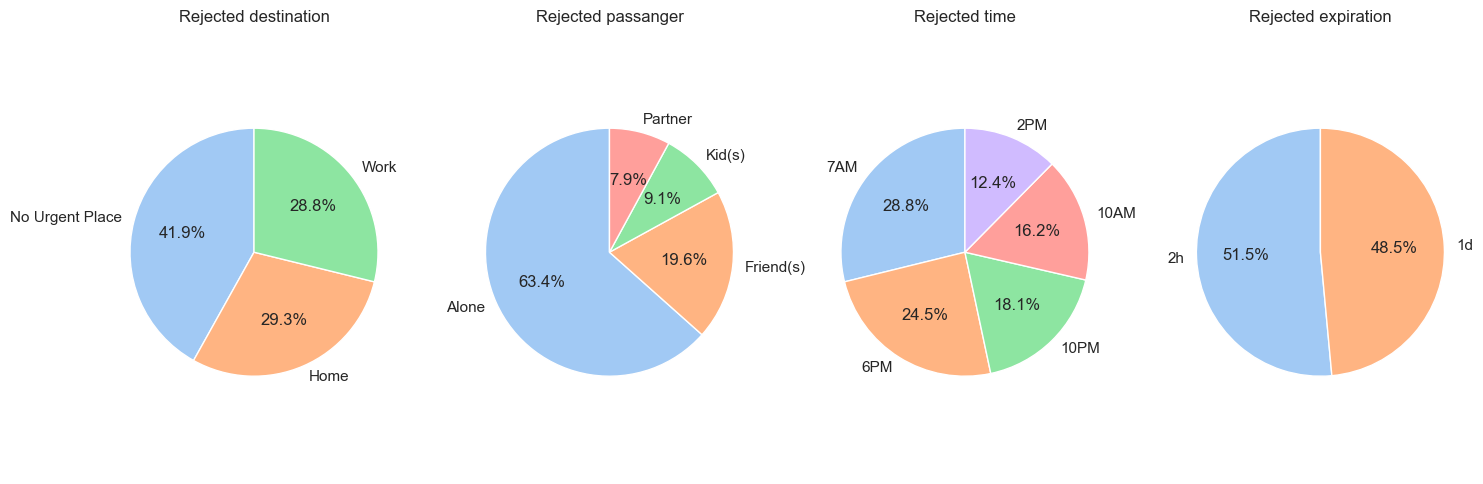

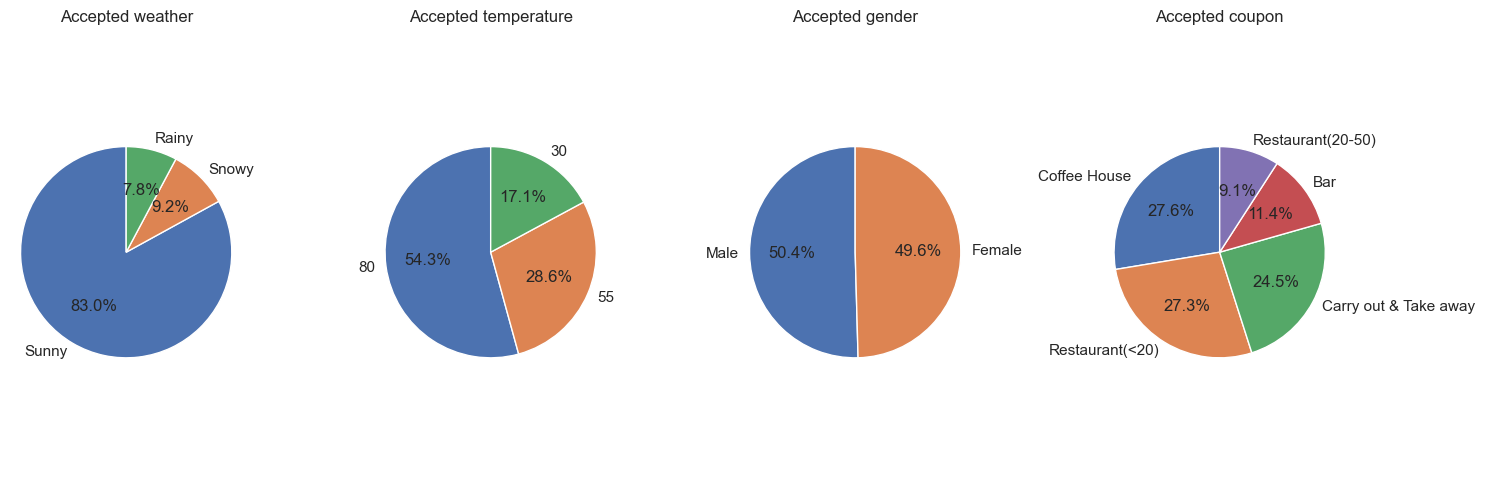

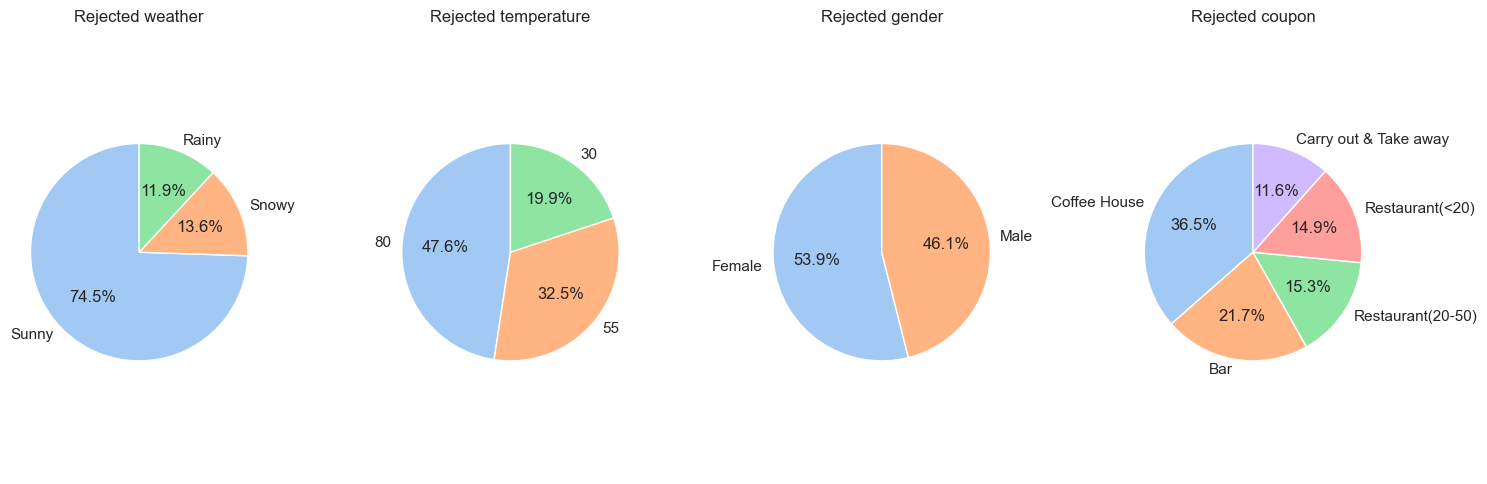

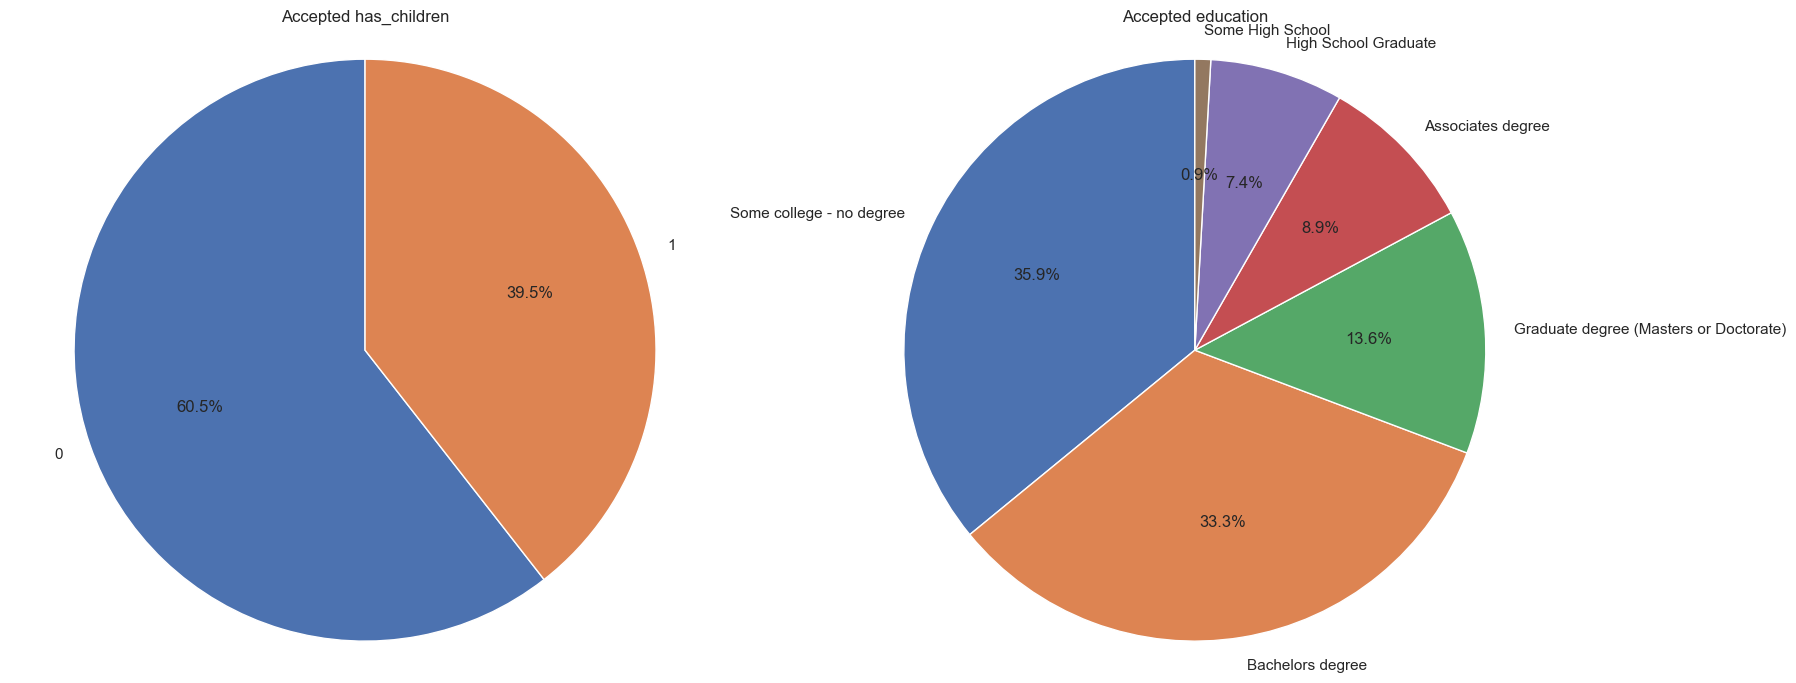

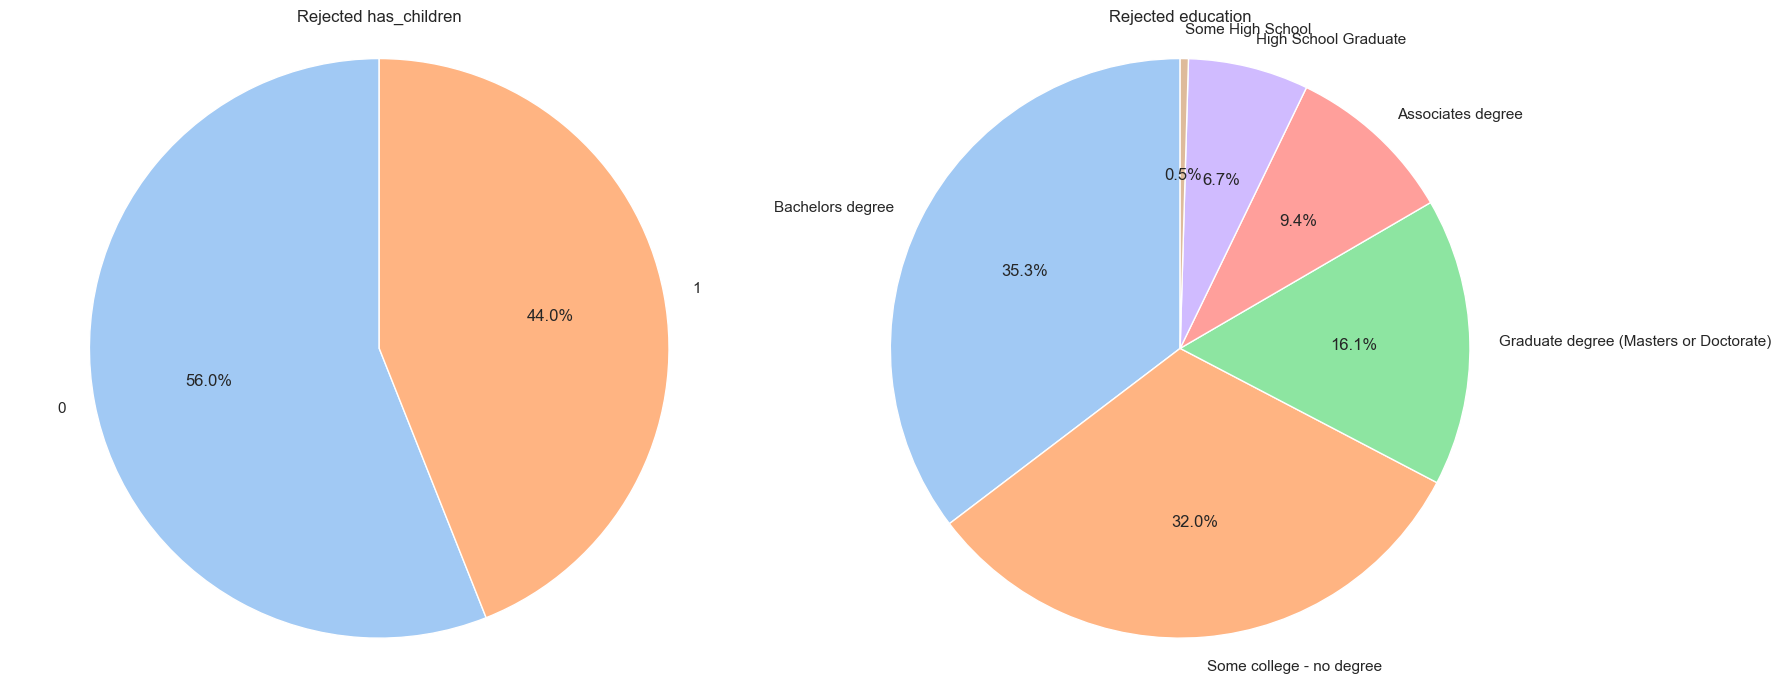

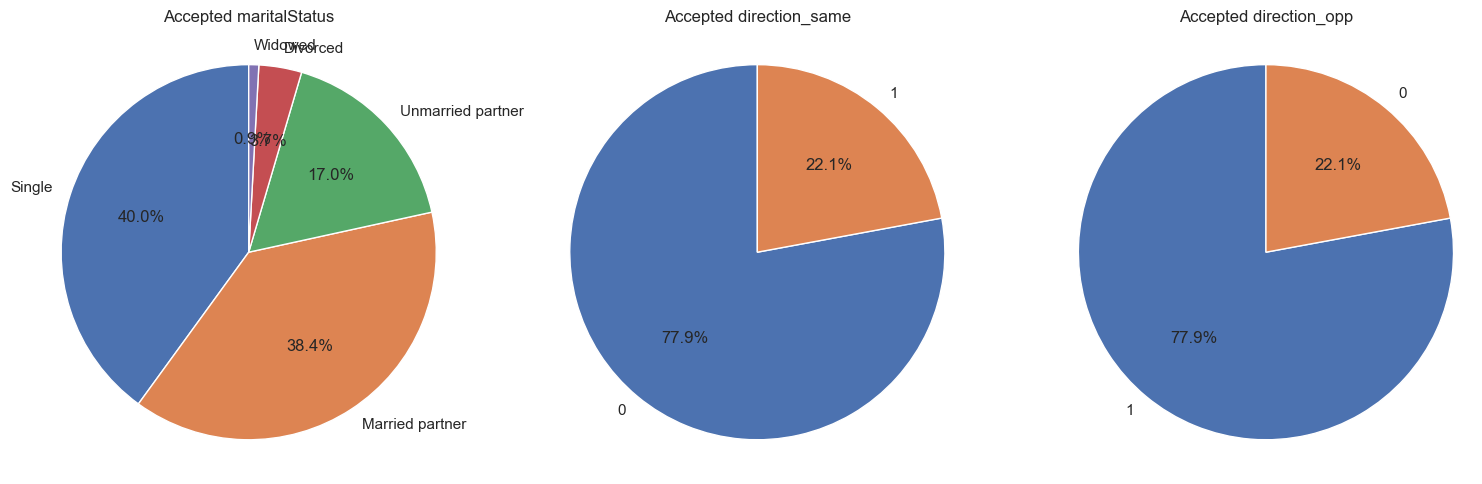

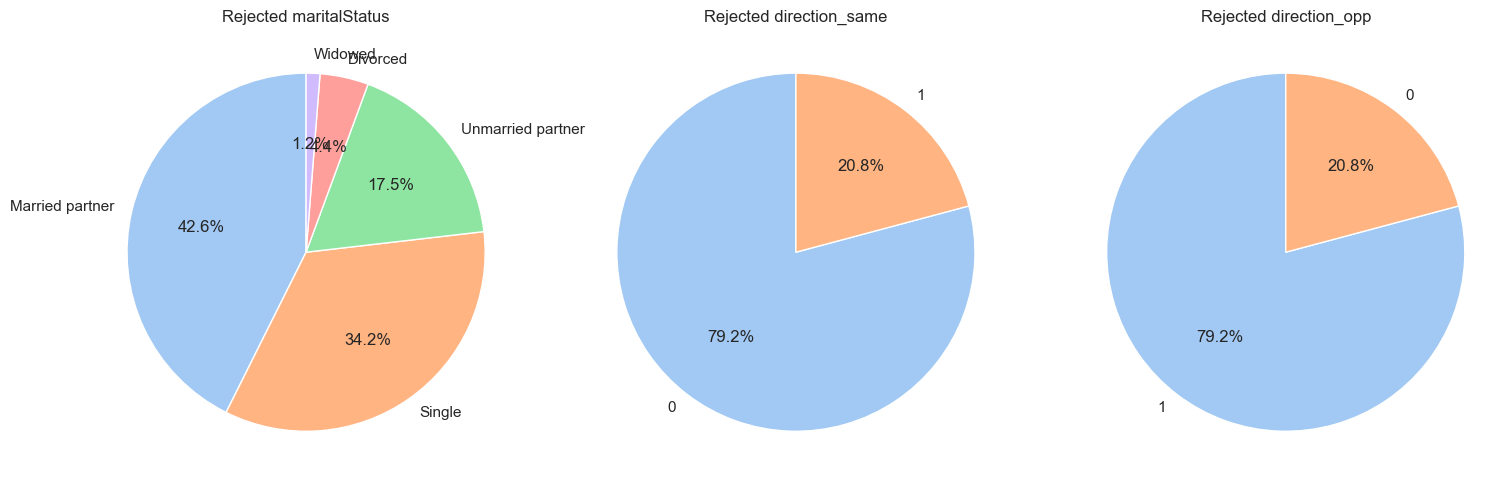

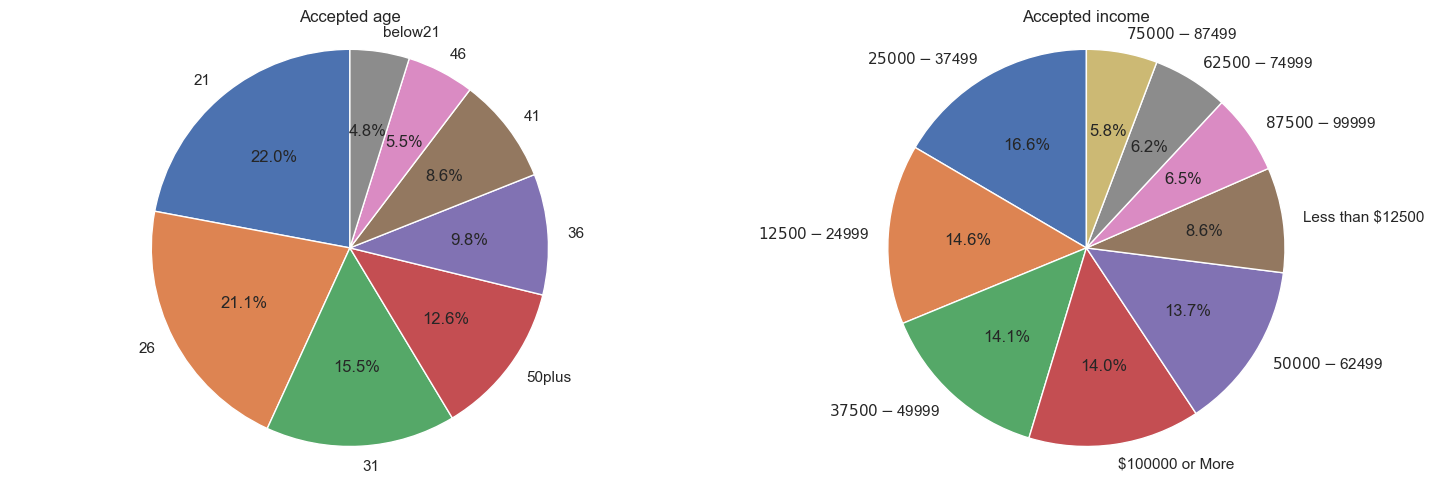

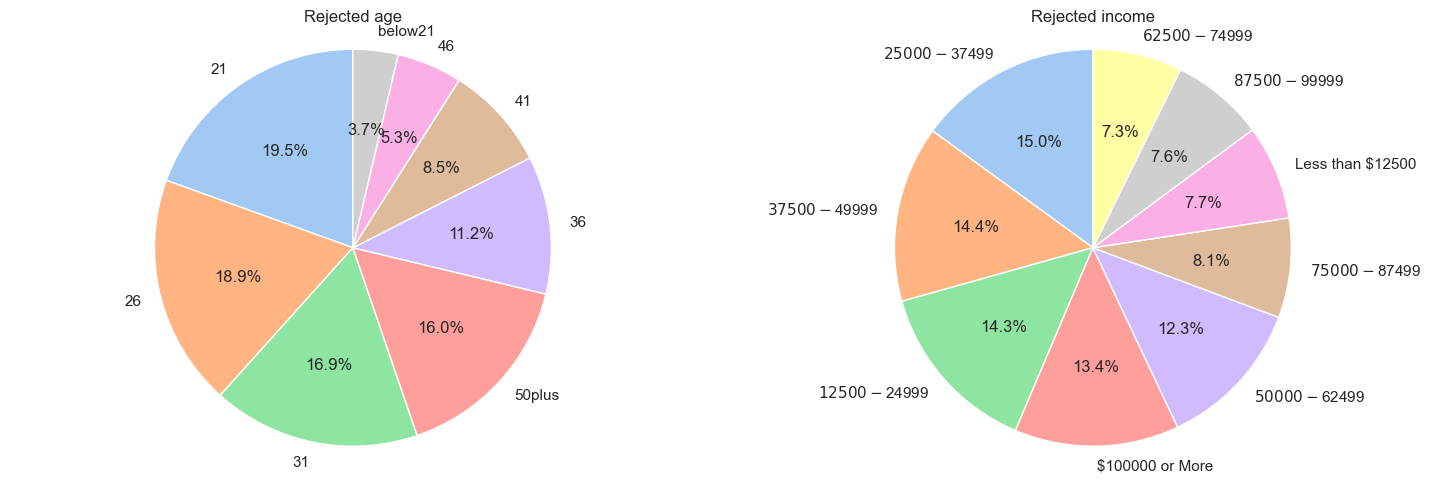

In [186]:
# For my independent investigation i want to focus on the environment, and personal factors that can affect the coupon acceptance.
# I want to understand 'destination','passanger','time','expiration','weather', 'temperature', 'gender','coupon','has_children','education','maritalStatus','age','direction_same','direction_opp' effects on the coupon acceptance.
# I will be looking at the following columns in the data set

non_habbit_data_columns = ['destination','passanger','time','expiration','weather', 'temperature', 'gender','coupon','has_children','education','maritalStatus','age','direction_same','direction_opp','Y','income']
non_habbit_data =  cleaned_data[non_habbit_data_columns]

# split the data into accepted and rejected coupons
non_habbit_data_accepted = non_habbit_data[non_habbit_data['Y'] == 1]
non_habbit_data_rejected = non_habbit_data[non_habbit_data['Y'] == 0]

print("Non Habbit Data Accepted count: ", non_habbit_data_accepted.shape)
print("Non Habbit Data Rejected count: ", non_habbit_data_rejected.shape)


# Building the pie charts for the accepted and rejected for each attribute in the data set.
List1 = ['destination','passanger','time','expiration']
fig, axes = plt.subplots(1, len(List1), figsize=(15, 5))

for i, col in enumerate(List1):
    axes[i].pie(non_habbit_data_accepted[col].value_counts(), labels=non_habbit_data_accepted[col].value_counts().index, autopct='%1.1f%%', startangle=90)
    axes[i].axis('equal') 
    axes[i].set_title("Accepted " + col)
    
plt.tight_layout()
plt.show()

fig, axes = plt.subplots(1, len(List1), figsize=(15, 5))

for i, col in enumerate(List1):
    axes[i].pie(non_habbit_data_rejected[col].value_counts(), labels=non_habbit_data_rejected[col].value_counts().index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette("pastel"))
    axes[i].axis('equal') 
    axes[i].set_title("Rejected " + col)
    
plt.tight_layout()
plt.show()

List2 = ['weather', 'temperature', 'gender','coupon']
fig, axes = plt.subplots(1, len(List2), figsize=(15, 5))

for i, col in enumerate(List2):
    axes[i].pie(non_habbit_data_accepted[col].value_counts(), labels=non_habbit_data_accepted[col].value_counts().index, autopct='%1.1f%%', startangle=90)
    axes[i].axis('equal') 
    axes[i].set_title("Accepted " + col)
    
plt.tight_layout()
plt.show()

fig, axes = plt.subplots(1, len(List2), figsize=(15, 5))

for i, col in enumerate(List2):
    axes[i].pie(non_habbit_data_rejected[col].value_counts(), labels=non_habbit_data_rejected[col].value_counts().index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette("pastel"))
    axes[i].axis('equal') 
    axes[i].set_title("Rejected " + col)
    
plt.tight_layout()
plt.show()

List3 = ['has_children','education']
fig, axes = plt.subplots(1, len(List3), figsize=(18, 7))

for i, col in enumerate(List3):
    axes[i].pie(non_habbit_data_accepted[col].value_counts(), labels=non_habbit_data_accepted[col].value_counts().index, autopct='%1.1f%%', startangle=90)
    axes[i].axis('equal') 
    axes[i].set_title("Accepted " + col)
    
plt.tight_layout()
plt.show()

fig, axes = plt.subplots(1, len(List3), figsize=(18, 7))

for i, col in enumerate(List3):
    axes[i].pie(non_habbit_data_rejected[col].value_counts(), labels=non_habbit_data_rejected[col].value_counts().index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette("pastel"))
    axes[i].axis('equal') 
    axes[i].set_title("Rejected " + col)
    
plt.tight_layout()
plt.show()


List4 = ['maritalStatus','direction_same','direction_opp']
fig, axes = plt.subplots(1, len(List4), figsize=(15, 5))

for i, col in enumerate(List4):
    axes[i].pie(non_habbit_data_accepted[col].value_counts(), labels=non_habbit_data_accepted[col].value_counts().index, autopct='%1.1f%%', startangle=90)
    axes[i].axis('equal') 
    axes[i].set_title("Accepted " + col)
    
plt.tight_layout()
plt.show()

fig, axes = plt.subplots(1, len(List4), figsize=(15, 5))

for i, col in enumerate(List4):
    axes[i].pie(non_habbit_data_rejected[col].value_counts(), labels=non_habbit_data_rejected[col].value_counts().index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette("pastel"))
    axes[i].axis('equal') 
    axes[i].set_title("Rejected " + col)
    
plt.tight_layout()
plt.show()

List5 = ['age','income']
fig, axes = plt.subplots(1, len(List5), figsize=(15, 5))

for i, col in enumerate(List5):
    axes[i].pie(non_habbit_data_accepted[col].value_counts(), labels=non_habbit_data_accepted[col].value_counts().index, autopct='%1.1f%%', startangle=90)
    axes[i].axis('equal') 
    axes[i].set_title("Accepted " + col)
    
plt.tight_layout()
plt.show()

fig, axes = plt.subplots(1, len(List5), figsize=(15, 5))

for i, col in enumerate(List5):
    axes[i].pie(non_habbit_data_rejected[col].value_counts(), labels=non_habbit_data_rejected[col].value_counts().index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette("pastel"))
    axes[i].axis('equal') 
    axes[i].set_title("Rejected " + col)
    
plt.tight_layout()
plt.show()



In [187]:
  # Coupon acceptance is more when the driver is traveling to less urgent places and we see more rejections when the drivers are heading home or to work
  # Coupon acceptance increases when the driver is with friends.
  # Coupon acceptance increases when the coupon expiration is more 1 day compared to 2h
  # Male drivers have higher acceptance to coupon then female drivers
  # Coupon acceptance is low when they driver have childrens which might hint at healthy food habbits
  # Coupon accptance is more when the drives has some college -  no degree and the rejection are more if the driver has Bachelor degree
  # Strangely coupon acceptance when traveling opposite direction is higher than traveling in the same direction

Acceptance rate Facet Grid


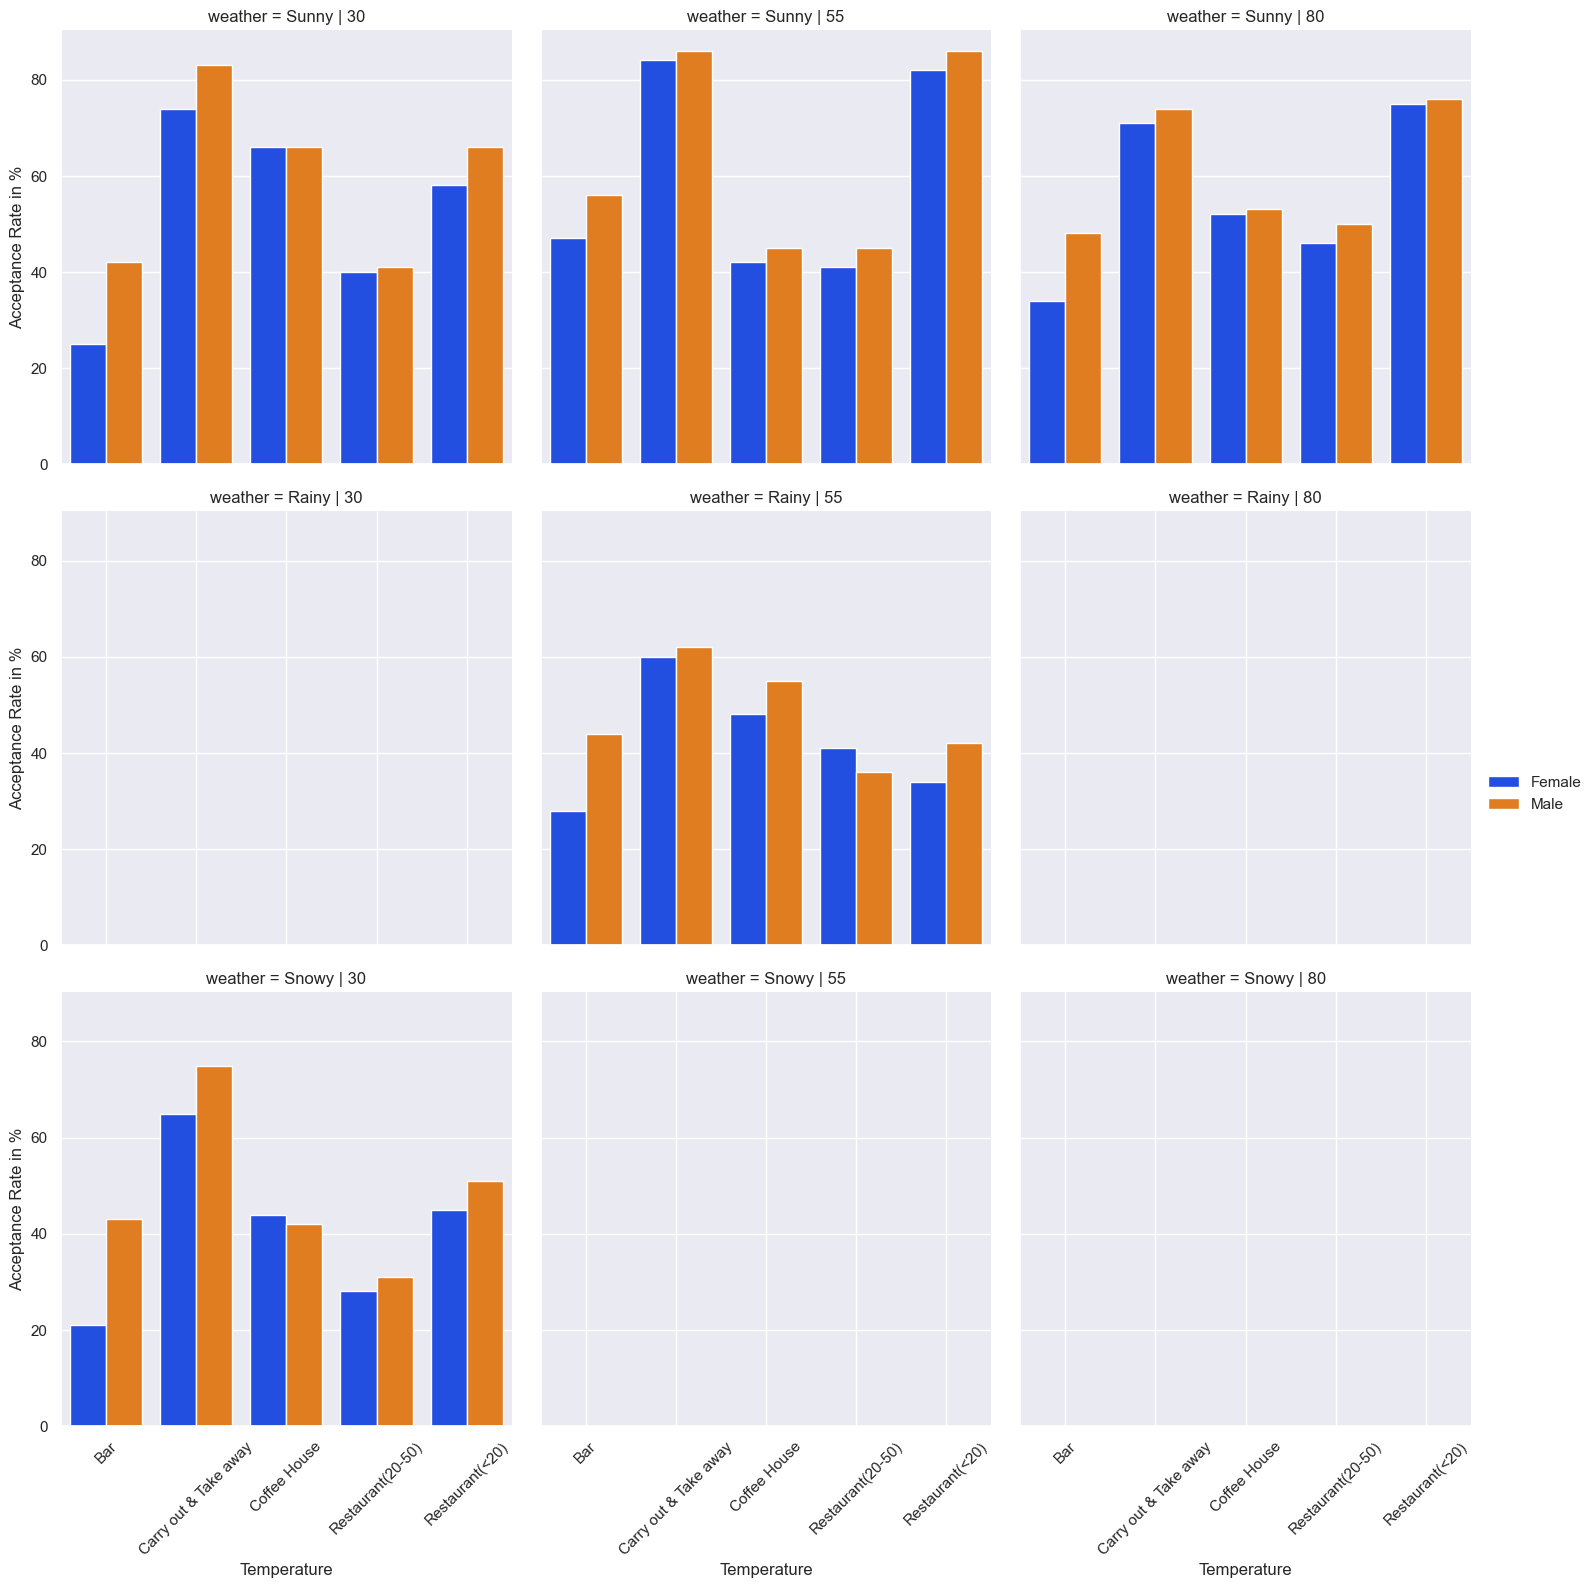

Rejected rate Facet Grid


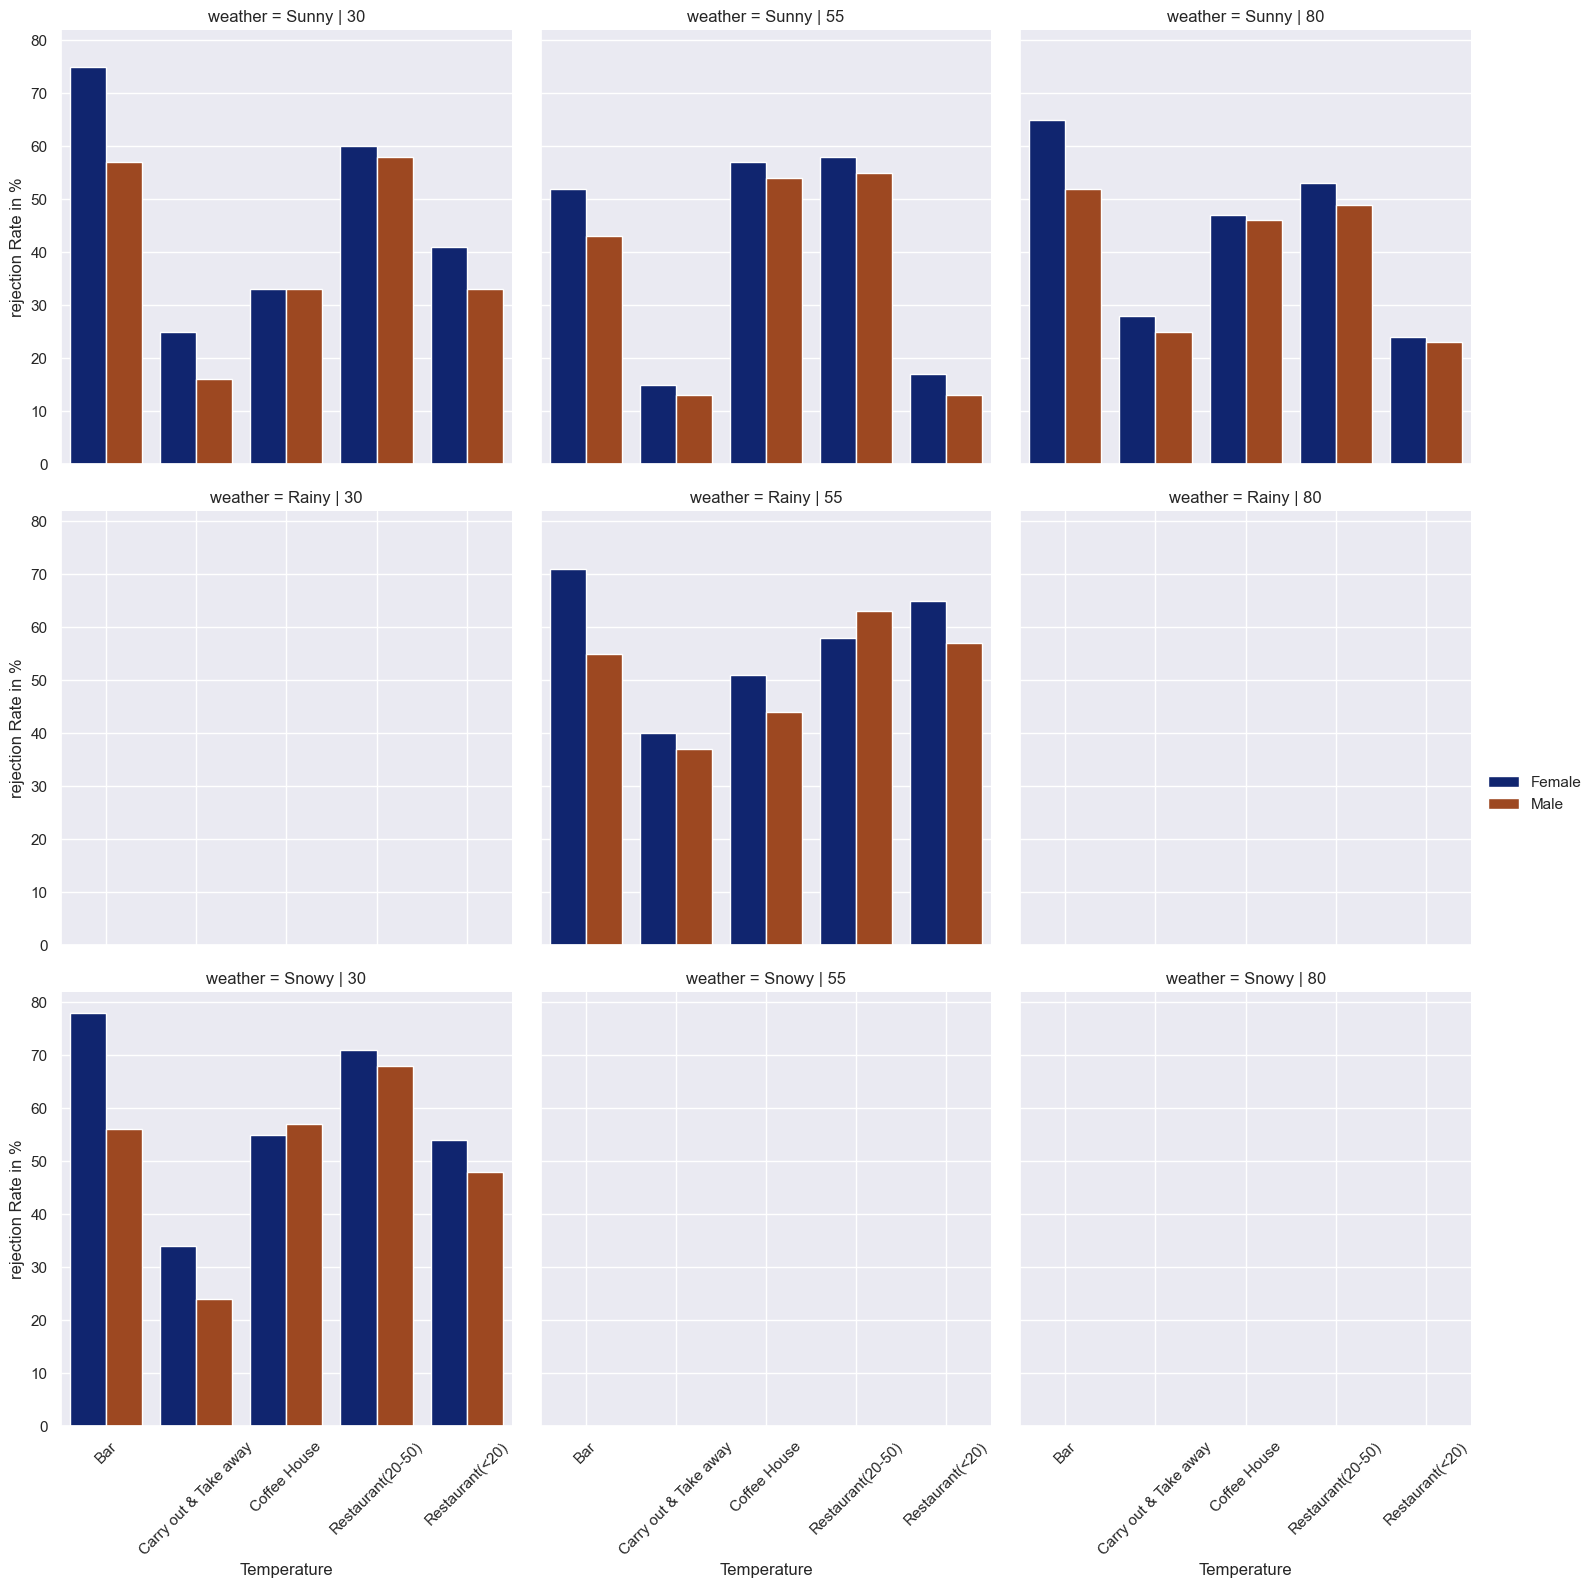

Accepted rate variance % by Gender Area Chart


Accepted rate variance % by Gender facet Grid


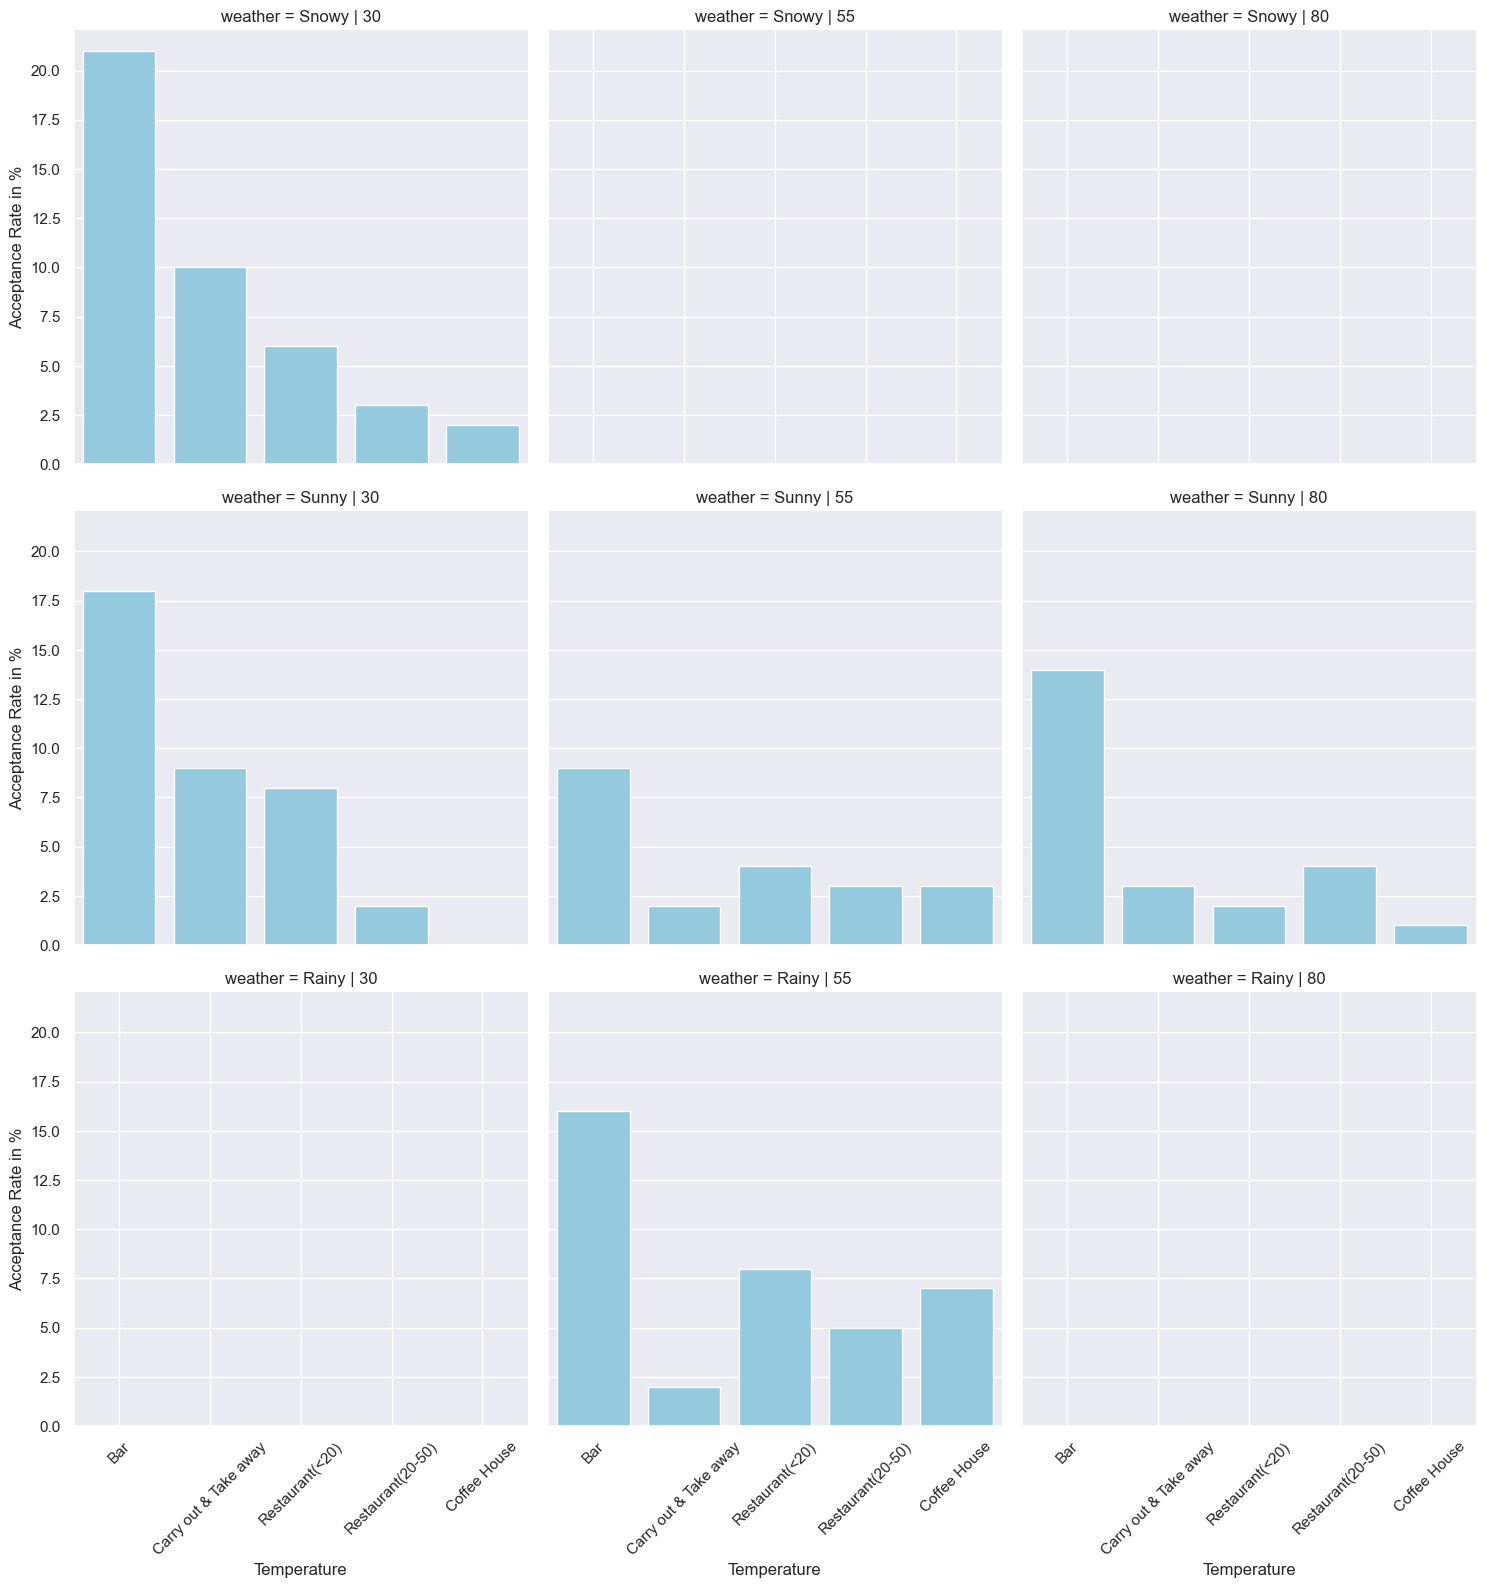

In [ ]:
acceptance_rate_with_coupon = non_habbit_data.groupby(['temperature','gender','weather','coupon'])['Y'].value_counts(normalize=True).unstack().fillna(0)
acceptance_rate_with_coupon = acceptance_rate_with_coupon.reset_index()
acceptance_rate_with_coupon.columns = ['temperature','gender','weather','coupon', 'rejected', 'accepted']
acceptance_rate_with_coupon = acceptance_rate_with_coupon.sort_values(by=['temperature','weather'], ascending=False)


acceptance_rate_with_coupon["accepted"] = acceptance_rate_with_coupon["accepted"].apply(lambda x: math.floor(x * 100))
acceptance_rate_with_coupon["rejected"] = acceptance_rate_with_coupon["rejected"].apply(lambda x: math.floor(x * 100))
print("Acceptance rate Facet Grid")

gr = sns.FacetGrid(acceptance_rate_with_coupon, row='weather',col='temperature',height=5, aspect=1)
gr.map_dataframe(sns.barplot, x='coupon', y='accepted',hue='gender',color='blue', palette='bright')
gr.set_axis_labels('Temperature', 'Acceptance Rate in %')
gr.set_titles(col_template="{col_name}")
gr.tick_params(axis='x', rotation=45)
gr.add_legend()
plt.show()

print("Rejected rate Facet Grid")

gr = sns.FacetGrid(acceptance_rate_with_coupon, row='weather',col='temperature',height=5, aspect=1)
gr.map_dataframe(sns.barplot, x='coupon', y='rejected',hue='gender',color='red', palette='dark')
gr.set_axis_labels('Temperature', 'rejection Rate in %')
gr.set_titles(col_template="{col_name}")
gr.tick_params(axis='x', rotation=45)
gr.add_legend()
plt.show()

# male vs female coupon acceptance rate variance

acceptance_rate_with_coupon_variance = non_habbit_data.groupby(['temperature','gender','weather','coupon'])['Y'].value_counts(normalize=True).unstack().fillna(0)
acceptance_rate_with_coupon_variance = acceptance_rate_with_coupon_variance.reset_index()
acceptance_rate_with_coupon_variance.columns = ['temperature','gender','weather','coupon', 'rejected', 'accepted']
acceptance_rate_with_coupon_variance = acceptance_rate_with_coupon_variance.sort_values(by=['temperature','weather'], ascending=False)



varience_df = acceptance_rate_with_coupon_variance.pivot_table(index=['temperature','weather','coupon'], columns ='gender', values=['accepted','rejected'])
varience_df.columns = ['_'.join(col).strip() for col in varience_df.columns.values]
varience_df = varience_df.reset_index()
varience_df['Gender_Variance_Acceptance'] = round((varience_df['accepted_Male'] - varience_df['accepted_Female']).abs(),2)
varience_df['Gender_Variance_Acceptance'] = varience_df['Gender_Variance_Acceptance'].apply(lambda x: math.floor(x * 100))

varience_df.head(10)

accepted_variance = varience_df[['temperature','weather','coupon','accepted_Female','accepted_Male','Gender_Variance_Acceptance']].sort_values(by=['Gender_Variance_Acceptance'], ascending=False)
accepted_variance.head(100)

# Acceptance rate variance by gender area chart
print("Accepted rate variance % by Gender Area Chart")
px.area(accepted_variance,x='coupon',y='Gender_Variance_Acceptance',facet_row='weather',facet_col='temperature').update_layout(yaxis=dict(tickangle=45)).show()  

  

# Acceptance rate variance by gender facet chart

print("Accepted rate variance % by Gender facet Grid")
gr = sns.FacetGrid(accepted_variance, row='weather',col='temperature',height=5, aspect=1)
gr.map_dataframe(sns.barplot, x='coupon', y='Gender_Variance_Acceptance', color='skyblue')
gr.set_axis_labels('Temperature', 'Acceptance Rate in %')
gr.set_titles(col_template="{col_name}")
gr.tick_params(axis='x', rotation=45)
gr.add_legend()
plt.show()

In [189]:

# The male coupon acceptance rate is more across all templerature and weather conditions and coupon types.
# sunny days have higher acceptance rate than rainy days and snowy days.
# Carry out & Take away accpetance rate is more on snowy days when the temperature is around 30 degrees.
# Carry out & Take away accpetance rate is more on rainy days when the temperature is around 55 degrees.
# Coupon accpetance rate is generally more for Carry out & Take away in both male and female drivers.
# Sunny days have higher acceptance rate than rainy days and snowy days.
# On sunny day around 80 degress the male driver to female drivers acceptance vaiance is low for all coupon types except for Bar coupon.
# Male driver to female driver acceptance vaiance is more for Bar coupon


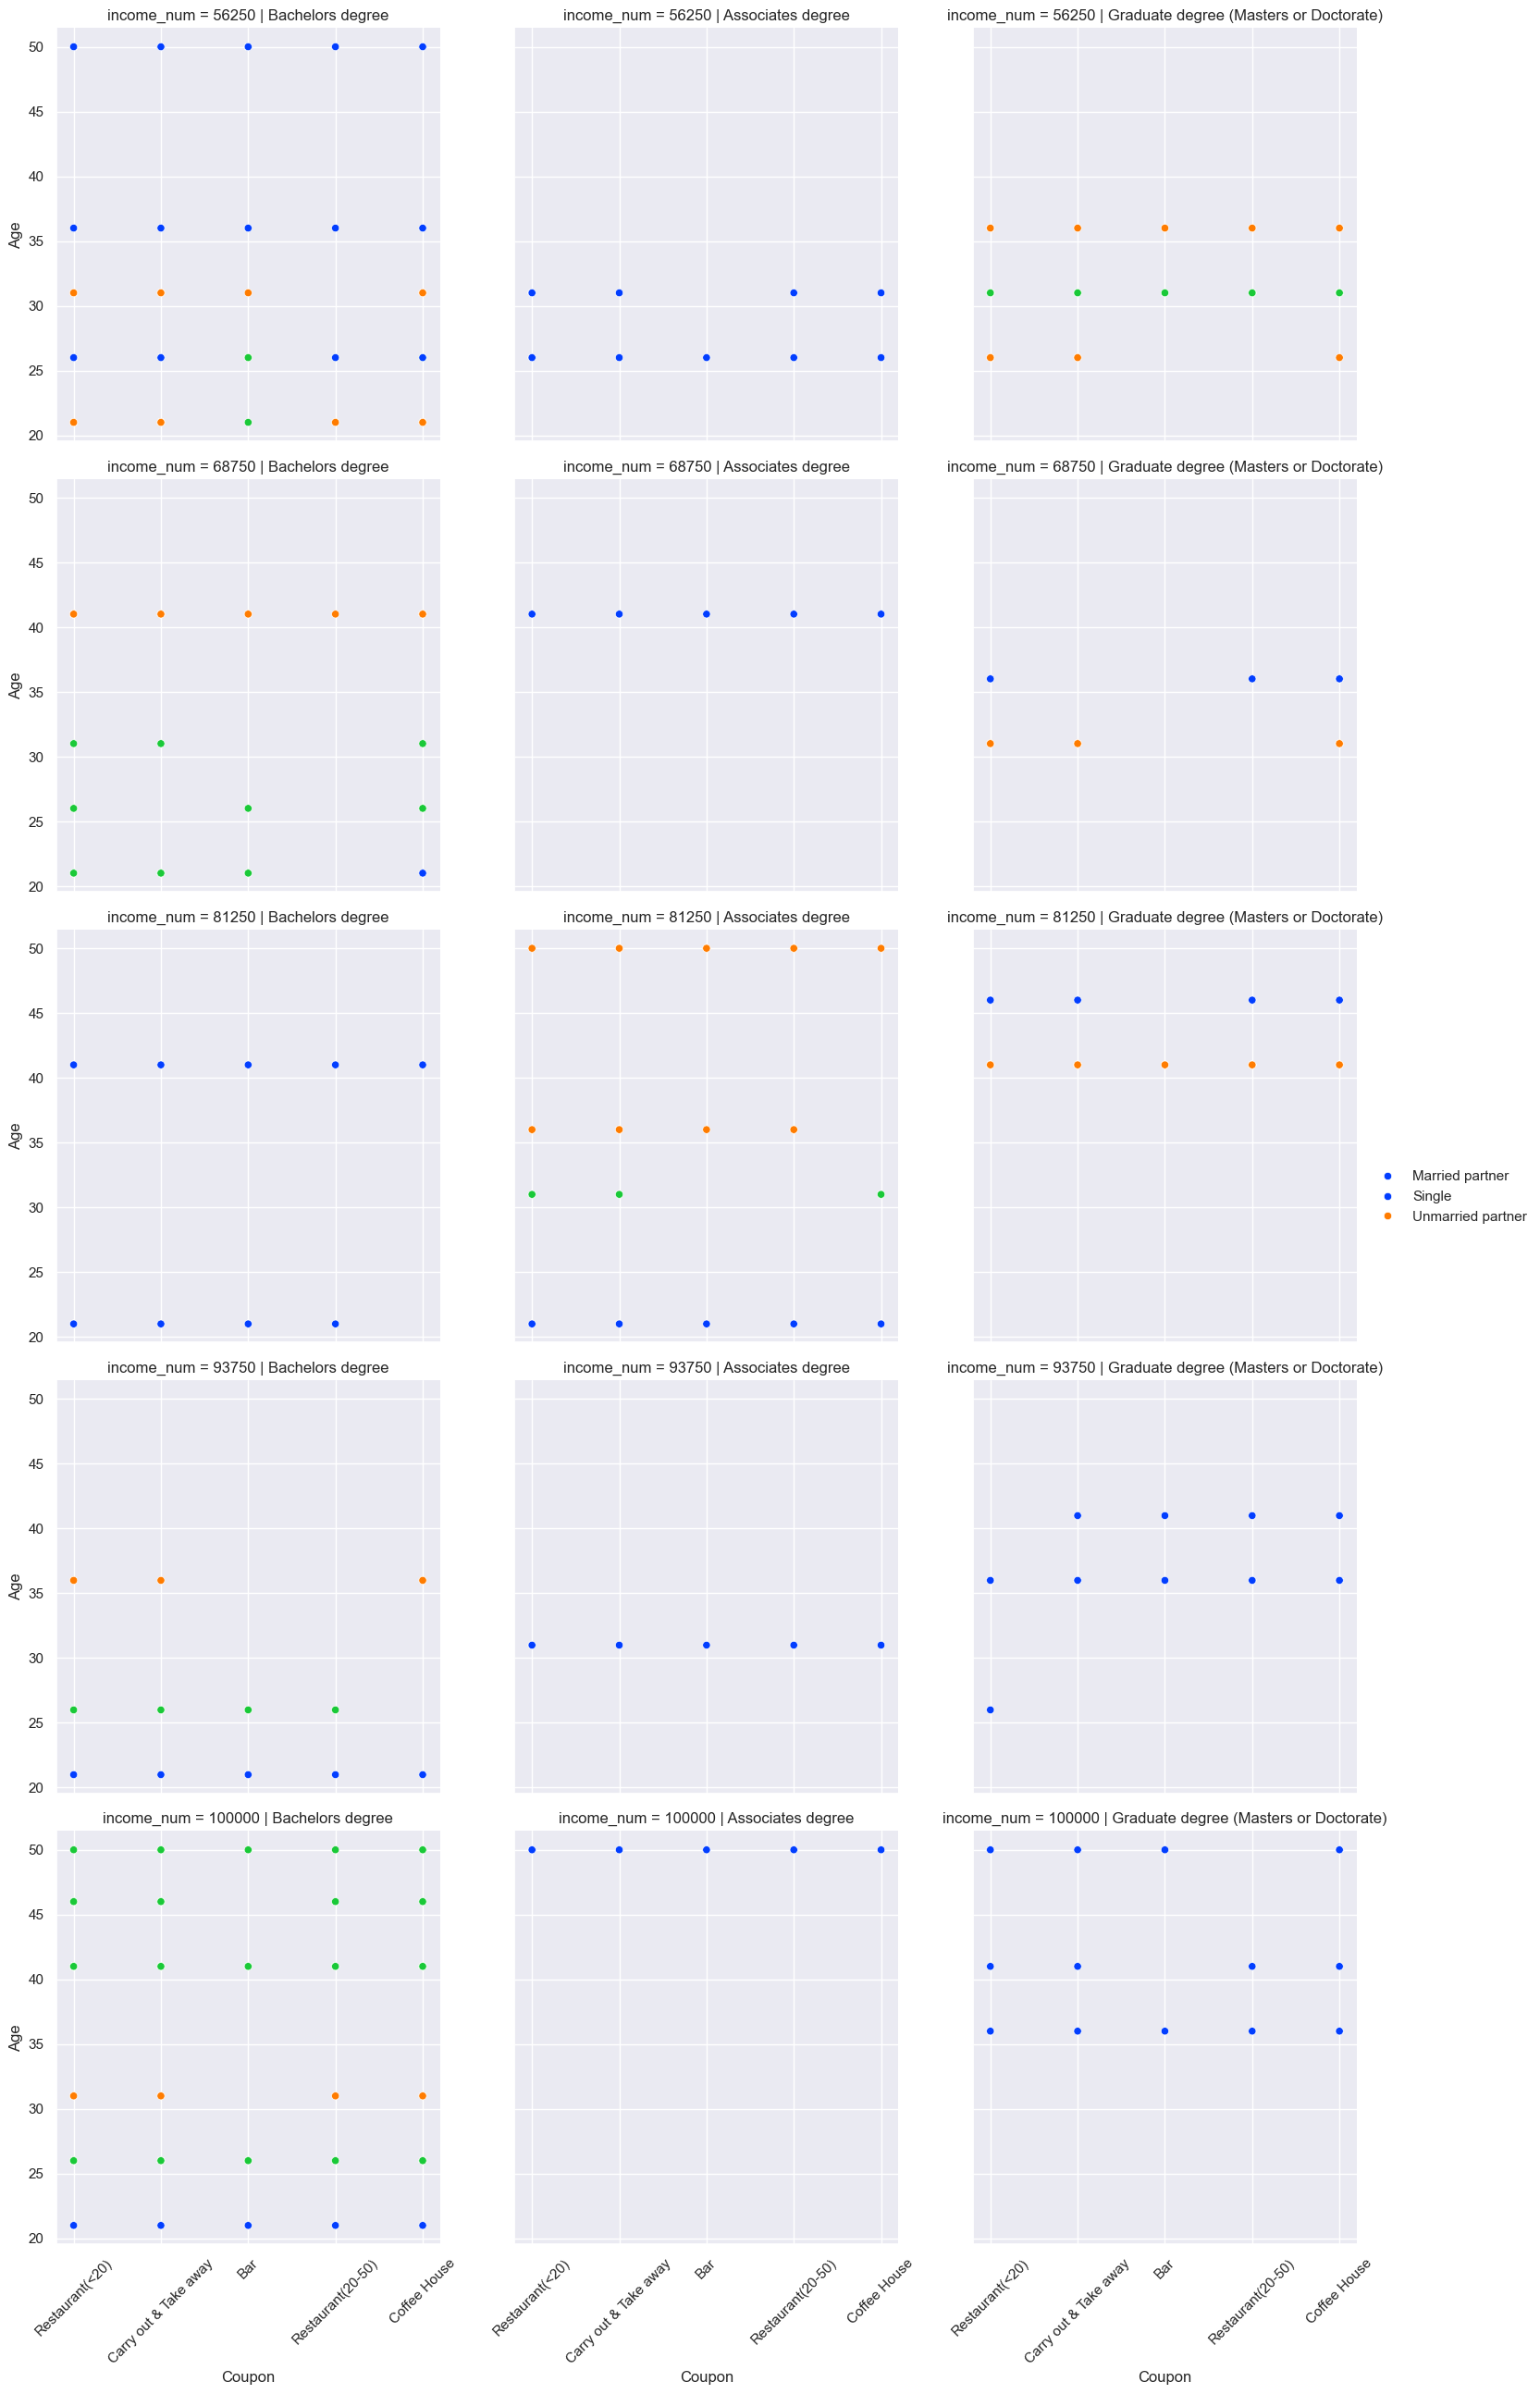

In [190]:


female_degree_over50K_not_unemployed = cleaned_data[
    (cleaned_data["gender"] == 'Female') &
    ~cleaned_data["income"].isin(['Less than $12500','$12500 - $24999','$25000 - $37499','$37500 - $49999']) &
    cleaned_data["education"].isin(['Graduate degree (Masters or Doctorate)','Associates degree','Bachelors degree']) &
    ~cleaned_data["occupation"].isin(['Unemployed','Retired']) &
    (cleaned_data["Y"]== 1)
]

female_degree_over50K_not_unemployed = female_degree_over50K_not_unemployed[['coupon','has_children','education','maritalStatus','age','income','occupation','Y']]

female_degree_over50K_not_unemployed['income_num'] = female_degree_over50K_not_unemployed['income'].map({'$50000 - $62499': 56250,
                                                 '$62500 - $74999': 68750, 
                                                 '$75000 - $87499': 81250, 
                                                 '$87500 - $99999': 93750, 
                                                 '$100000 or More': 100000}) 


female_degree_over50K_not_unemployed['age_num'] = female_degree_over50K_not_unemployed['age'].map({'below21': 18,
                                                 '21': 21,
                                                 '26': 26, 
                                                 '31': 31,
                                                 '36': 36,
                                                 '41': 41,
                                                 '46': 46, 
                                                 '50plus': 50 }) 


gr = sns.FacetGrid(female_degree_over50K_not_unemployed, row='income_num',col='education',height=5, aspect=1)
gr.map_dataframe(sns.scatterplot, x='coupon', y='age_num',hue='maritalStatus',color='blue', palette='bright')
gr.set_axis_labels('Coupon', 'Age')

gr.set_titles(col_template="{col_name}")
gr.tick_params(axis='x', rotation=45)
gr.add_legend()
plt.show()



In [191]:
# Few Observations from the above analysis
# for a women earning more than 50K with a degree and a job
# Women drivers with bachalor degree are more likely to accept the coupon than other women drivers with a degree.
# Married partmers are more likely to accept the coupon than single and unmarried partners.
# interestingly the category did not have any devorced or widowed partners.
# Drivers with Bachalor degree are more likely to accept a coupon
# when income is mid 50k they coupon acceptance is more

